<a href="https://colab.research.google.com/github/lurodriguezzz/intership_metal/blob/main/data_w_backup_final_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade scipy statsmodels numpy pandas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 50.8 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires numpy<2.0a0,>=1.23, but you have numpy 2.0.1 which is incompatible.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 2.2.2 which is incompatible.
econml 0.15.1 requires numpy<2, but you have numpy 2.0.1 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 2.2.2 which is incompatible.
ibis-framework 8.0.0 requires numpy<2,>=1, but you have numpy 2.0.1 which is incompatible.


In [ ]:
!pip uninstall statsmodels
!pip install statsmodels

Found existing installation: statsmodels 0.14.2
Uninstalling statsmodels-0.14.2:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/statsmodels-0.14.2.dist-info/*
    /usr/local/lib/python3.10/dist-packages/statsmodels/*
Proceed (Y/n)? Y
  Successfully uninstalled statsmodels-0.14.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 19.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
econml 0.15.1 requires numpy<2, but you have numpy 2.0.1 which is incompatible.


In [ ]:
!pip install --upgrade numpy scipy statsmodels

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
#import matplotlib.pyplot as plt
import seaborn as sns
import os
import sklearn.preprocessing as skp
import sklearn.decomposition as skd
import sklearn.manifold as skm
import sklearn.cluster as skc
import scipy.cluster.hierarchy as scich
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import sklearn.model_selection as skms
import sklearn.preprocessing as skpp
import sklearn.metrics as skm
import sklearn.pipeline as skpl
import sklearn.tree as skt
import sklearn.neighbors as skn
import sklearn.svm as skv
import sklearn.ensemble as ske
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
from sklearn.cluster import KMeans
!pip install pyclustering
import pyclustering
#!pip install -U scikit-learn numpy scipy
!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids
import plotly.express as px
#!pip install kmedoids
#!pip install econml
#import kmedoids
#import econml
#!pip install statsmodels
import statsmodels.api as sm

In [2]:
from google.colab import drive
drive.mount('/content/drive')
#!ls "/content/drive/My Drive/"
df = pd.read_excel("/content/drive/My Drive/Coskun & Weller EEH 2022 consolidated data .xlsx")
df = pd.DataFrame(df)
df.dropna(how = 'any', inplace = True)
display(df)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,country,year,spread,marketspread,yearsondefault,yearsongold,shareofexportstouk,exportspc,debtovertax,yearsofdomesticpeace,electedexecutive,effectivelegislature,region,regimetype,gdppcin2011usd
0,Argentina,1870,0.034030,0.048170,0.0,1.0,0.154221,5.266835,3.667036,1.0,1.0,1.0,South America,truedemocracy,2514.0
1,Argentina,1871,0.031761,0.043261,0.0,1.0,0.230964,4.505680,5.515697,1.0,1.0,1.0,South America,truedemocracy,2571.4
2,Argentina,1872,0.029849,0.038526,0.0,1.0,0.126251,7.566392,5.833216,1.0,1.0,1.0,South America,truedemocracy,2628.8
3,Argentina,1873,0.028971,0.046547,0.0,1.0,0.172280,7.291472,5.316960,1.0,1.0,1.0,South America,truedemocracy,2686.2
4,Argentina,1874,0.030796,0.047725,0.0,1.0,0.089520,6.593757,5.137359,1.0,1.0,1.0,South America,truedemocracy,2743.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176,Venezuela,1902,0.074629,0.015926,1.0,0.0,0.028733,0.706619,9.290000,1.0,1.0,0.0,Central America,presidentialdemocracy,793.0
1177,Venezuela,1903,0.060839,0.015149,1.0,0.0,0.019393,1.435443,4.730000,1.0,1.0,0.0,Central America,presidentialdemocracy,848.0
1178,Venezuela,1904,0.058871,0.017419,1.0,0.0,0.059769,1.284728,5.720000,2.0,1.0,0.0,Central America,presidentialdemocracy,857.0
1179,Venezuela,1905,0.029346,0.017701,1.0,0.0,0.064044,1.428703,4.570000,3.0,1.0,0.0,Central America,presidentialdemocracy,866.0


In [3]:
df['d_spread'] = (df['spread'] - df['marketspread'])/df['spread']
df.drop(columns = ['spread', 'marketspread', 'country'], inplace = True)
df = df.dropna(how = 'any')
df.reset_index(drop = True, inplace = True)
df = pd.get_dummies(df)
df.replace(False, 0 , inplace = True)
df.replace(True,  1 , inplace = True)
df

,year,yearsondefault,yearsongold,shareofexportstouk,exportspc,debtovertax,yearsofdomesticpeace,electedexecutive,effectivelegislature,gdppcin2011usd,...,region_Asia,region_Central America,region_Eastern Europe,region_North Europe,region_South America,region_South Europe,regimetype_constitutionalmonarchy,regimetype_presidentialdemocracy,regimetype_trueautocracy,regimetype_truedemocracy
0,1870,0.0,1.0,0.154221,5.266835,3.667036,1.0,1.0,1.0,2514.0,...,0,0,0,0,1,0,0,0,0,1
1,1871,0.0,1.0,0.230964,4.505680,5.515697,1.0,1.0,1.0,2571.4,...,0,0,0,0,1,0,0,0,0,1
2,1872,0.0,1.0,0.126251,7.566392,5.833216,1.0,1.0,1.0,2628.8,...,0,0,0,0,1,0,0,0,0,1
3,1873,0.0,1.0,0.172280,7.291472,5.316960,1.0,1.0,1.0,2686.2,...,0,0,0,0,1,0,0,0,0,1
4,1874,0.0,1.0,0.089520,6.593757,5.137359,1.0,1.0,1.0,2743.6,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,1902,1.0,0.0,0.028733,0.706619,9.290000,1.0,1.0,0.0,793.0,...,0,1,0,0,0,0,0,1,0,0
970,1903,1.0,0.0,0.019393,1.435443,4.730000,1.0,1.0,0.0,848.0,...,0,1,0,0,0,0,0,1,0,0
971,1904,1.0,0.0,0.059769,1.284728,5.720000,2.0,1.0,0.0,857.0,...,0,1,0,0,0,0,0,1,0,0
972,1905,1.0,0.0,0.064044,1.428703,4.570000,3.0,1.0,0.0,866.0,...,0,1,0,0,0,0,0,1,0,0


In [ ]:
df.isna().sum()

year                                 0
yearsondefault                       0
yearsongold                          0
shareofexportstouk                   0
exportspc                            0
debtovertax                          0
yearsofdomesticpeace                 0
electedexecutive                     0
effectivelegislature                 0
gdppcin2011usd                       0
d_spread                             0
region_Asia                          0
region_Central America               0
region_Eastern Europe                0
region_North Europe                  0
region_South America                 0
region_South Europe                  0
regimetype_constitutionalmonarchy    0
regimetype_presidentialdemocracy     0
regimetype_trueautocracy             0
regimetype_truedemocracy             0
dtype: int64

<Axes: >

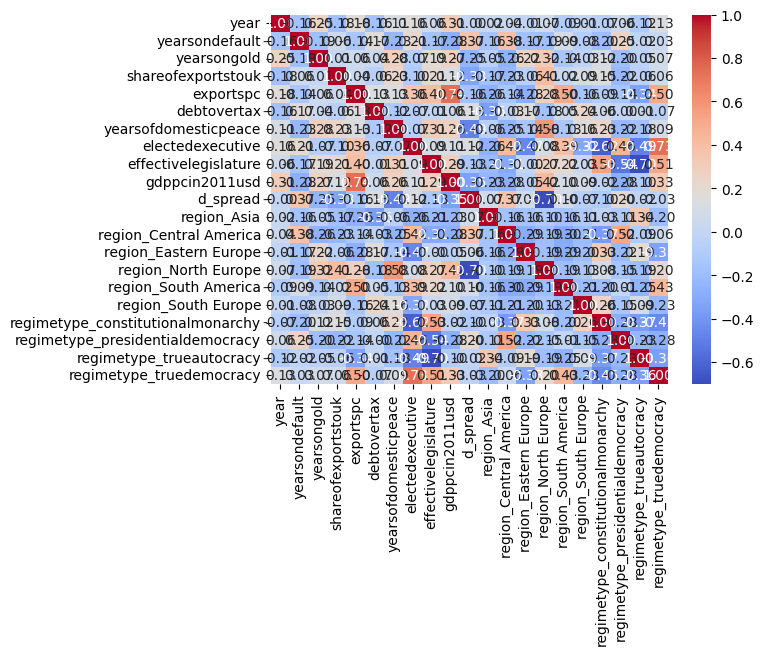

In [ ]:
cor1 = df.corr()
sns.heatmap(cor1, annot=True, cmap='coolwarm', fmt=".2f")

In [ ]:
scaler = skp.StandardScaler( )
df_n = pd.DataFrame( scaler.fit_transform( df.values ), index = df.index, columns = df.columns)
na = df_n.columns.isna().sum()
if na > 0:
  df_n.dropna(how = 'any').head()
else:
  df_n.head()

df_n

,year,yearsondefault,yearsongold,shareofexportstouk,exportspc,debtovertax,yearsofdomesticpeace,electedexecutive,effectivelegislature,gdppcin2011usd,...,region_Asia,region_Central America,region_Eastern Europe,region_North Europe,region_South America,region_South Europe,regimetype_constitutionalmonarchy,regimetype_presidentialdemocracy,regimetype_trueautocracy,regimetype_truedemocracy
0,-1.814937,-0.532229,1.590278,-0.539451,1.049382,0.055427,-0.894712,1.099371,0.774173,0.383900,...,-0.2971,-0.551255,-0.533817,-0.351303,1.829813,-0.376633,-0.684894,-0.414827,-0.543335,1.506140
1,-1.733165,-0.532229,1.590278,-0.237541,0.755352,0.799317,-0.894712,1.099371,0.774173,0.431786,...,-0.2971,-0.551255,-0.533817,-0.351303,1.829813,-0.376633,-0.684894,-0.414827,-0.543335,1.506140
2,-1.651393,-0.532229,1.590278,-0.649486,1.937691,0.927084,-0.894712,1.099371,0.774173,0.479672,...,-0.2971,-0.551255,-0.533817,-0.351303,1.829813,-0.376633,-0.684894,-0.414827,-0.543335,1.506140
3,-1.569621,-0.532229,1.590278,-0.468406,1.831491,0.719346,-0.894712,1.099371,0.774173,0.527559,...,-0.2971,-0.551255,-0.533817,-0.351303,1.829813,-0.376633,-0.684894,-0.414827,-0.543335,1.506140
4,-1.487849,-0.532229,1.590278,-0.793988,1.561967,0.647076,-0.894712,1.099371,0.774173,0.575445,...,-0.2971,-0.551255,-0.533817,-0.351303,1.829813,-0.376633,-0.684894,-0.414827,-0.543335,1.506140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,0.801769,1.878891,-0.628821,-1.033126,-0.712210,2.318072,-0.894712,1.099371,-1.291702,-1.051859,...,-0.2971,1.814042,-0.533817,-0.351303,-0.546504,-0.376633,-0.684894,2.410641,-0.543335,-0.663949
970,0.883541,1.878891,-0.628821,-1.069870,-0.430668,0.483157,-0.894712,1.099371,-1.291702,-1.005975,...,-0.2971,1.814042,-0.533817,-0.351303,-0.546504,-0.376633,-0.684894,2.410641,-0.543335,-0.663949
971,0.965313,1.878891,-0.628821,-0.911029,-0.488888,0.881527,-0.842012,1.099371,-1.291702,-0.998467,...,-0.2971,1.814042,-0.533817,-0.351303,-0.546504,-0.376633,-0.684894,2.410641,-0.543335,-0.663949
972,1.047085,1.878891,-0.628821,-0.894211,-0.433272,0.418774,-0.789312,1.099371,-1.291702,-0.990959,...,-0.2971,1.814042,-0.533817,-0.351303,-0.546504,-0.376633,-0.684894,2.410641,-0.543335,-0.663949


In [ ]:
!pip install openpyxl
file_path = '/content/drive/My Drive/dfn_n.xlsx'  # Specify your path and file name
df_n.to_excel(file_path, engine='openpyxl', index=False)


In [4]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
#!ls "/content/drive/My Drive/"
enc_dt = pd.read_excel("/content/drive/My Drive/enc_dt_p3.xlsx")
enc_dt = pd.DataFrame(enc_dt)
enc_dt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,AE1,AE2,AE3,AE4,AE5,AE6,AE7,AE8,AE9,AE10,AE11,AE12,AE13,AE14,AE15,AE16,AE17
0,0.419787,6.266254,7.001127,0.000000,3.736659,0.00000,5.104158,0.000000,1.658580,0.977056,0.000000,0.620595,5.539361,0.000000,4.695293,1.099110,8.233364
1,1.430170,5.532334,6.625971,0.000000,4.482344,0.00000,4.773986,0.286285,0.578754,0.000000,0.000000,1.382635,5.712290,0.000000,4.588159,2.230788,7.894544
2,1.014277,6.644401,7.638694,0.000000,5.350641,0.00000,5.012860,0.000000,0.140545,0.232268,0.000000,0.982123,5.587796,0.000000,5.561620,2.827157,7.667775
3,1.068838,6.721381,7.634053,0.000000,4.476058,0.00000,4.627808,0.000000,0.395116,0.280133,0.000000,1.019631,5.042754,0.000000,6.011087,2.570785,7.757157
4,1.016361,6.877065,7.507056,0.000000,4.554413,0.00000,4.504714,0.000000,0.762202,0.660856,0.000000,0.437257,4.863821,0.000000,5.597581,2.762907,7.701799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,6.481971,1.904945,7.258997,1.390311,3.886546,0.00000,0.000000,12.020529,0.000000,1.907437,8.224160,0.000000,5.618021,0.000000,0.000000,8.966099,0.000000
970,4.398636,3.355351,6.698702,1.908398,1.709918,0.00000,0.000000,10.971500,0.000000,4.667946,8.097591,0.000000,5.223562,0.572464,0.000000,5.632507,0.000000
971,4.931141,3.064270,6.593231,1.750200,1.992072,0.00000,0.000000,11.284143,0.000000,3.903171,7.907308,0.000000,5.138813,0.703096,0.000000,6.359219,0.000000
972,4.573556,3.481539,6.712161,1.633941,0.922541,0.00000,0.000000,11.042580,0.000000,4.590406,7.176072,0.000000,4.500865,0.968131,0.000000,5.804788,0.000000


In [5]:
ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMedoids(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(enc_dt)
    ssd.append(model_clus.inertia_)

#plt.plot(ssd)
#plt.show()

In [7]:
df = df.reset_index()
#df.drop('level_0', inplace = True)
df

,level_0,index,year,yearsondefault,yearsongold,shareofexportstouk,exportspc,debtovertax,yearsofdomesticpeace,electedexecutive,...,region_Asia,region_Central America,region_Eastern Europe,region_North Europe,region_South America,region_South Europe,regimetype_constitutionalmonarchy,regimetype_presidentialdemocracy,regimetype_trueautocracy,regimetype_truedemocracy
0,0,0,1870,0.0,1.0,0.154221,5.266835,3.667036,1.0,1.0,...,0,0,0,0,1,0,0,0,0,1
1,1,1,1871,0.0,1.0,0.230964,4.505680,5.515697,1.0,1.0,...,0,0,0,0,1,0,0,0,0,1
2,2,2,1872,0.0,1.0,0.126251,7.566392,5.833216,1.0,1.0,...,0,0,0,0,1,0,0,0,0,1
3,3,3,1873,0.0,1.0,0.172280,7.291472,5.316960,1.0,1.0,...,0,0,0,0,1,0,0,0,0,1
4,4,4,1874,0.0,1.0,0.089520,6.593757,5.137359,1.0,1.0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,969,969,1902,1.0,0.0,0.028733,0.706619,9.290000,1.0,1.0,...,0,1,0,0,0,0,0,1,0,0
970,970,970,1903,1.0,0.0,0.019393,1.435443,4.730000,1.0,1.0,...,0,1,0,0,0,0,0,1,0,0
971,971,971,1904,1.0,0.0,0.059769,1.284728,5.720000,2.0,1.0,...,0,1,0,0,0,0,0,1,0,0
972,972,972,1905,1.0,0.0,0.064044,1.428703,4.570000,3.0,1.0,...,0,1,0,0,0,0,0,1,0,0


Usar enc_dt_p1 e enc_dt_p2

In [11]:
k_m = KMedoids(n_clusters=7, random_state=0)
k_m.fit(enc_dt)
k_m = pd.concat([enc_dt, pd.Series(k_m.labels_)], axis=1)
k_m.rename(columns={0:'Cluster_med'}, inplace=True)
clusters = df.join(k_m, lsuffix="_left")
#clusters = pd.concat([df,k_m], axis = 1)
clusters

,level_0,index,year,yearsondefault,yearsongold,shareofexportstouk,exportspc,debtovertax,yearsofdomesticpeace,electedexecutive,...,AE9,AE10,AE11,AE12,AE13,AE14,AE15,AE16,AE17,Cluster_med
0,0,0,1870,0.0,1.0,0.154221,5.266835,3.667036,1.0,1.0,...,1.658580,0.977056,0.000000,0.620595,5.539361,0.000000,4.695293,1.099110,8.233364,4
1,1,1,1871,0.0,1.0,0.230964,4.505680,5.515697,1.0,1.0,...,0.578754,0.000000,0.000000,1.382635,5.712290,0.000000,4.588159,2.230788,7.894544,4
2,2,2,1872,0.0,1.0,0.126251,7.566392,5.833216,1.0,1.0,...,0.140545,0.232268,0.000000,0.982123,5.587796,0.000000,5.561620,2.827157,7.667775,4
3,3,3,1873,0.0,1.0,0.172280,7.291472,5.316960,1.0,1.0,...,0.395116,0.280133,0.000000,1.019631,5.042754,0.000000,6.011087,2.570785,7.757157,4
4,4,4,1874,0.0,1.0,0.089520,6.593757,5.137359,1.0,1.0,...,0.762202,0.660856,0.000000,0.437257,4.863821,0.000000,5.597581,2.762907,7.701799,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,969,969,1902,1.0,0.0,0.028733,0.706619,9.290000,1.0,1.0,...,0.000000,1.907437,8.224160,0.000000,5.618021,0.000000,0.000000,8.966099,0.000000,2
970,970,970,1903,1.0,0.0,0.019393,1.435443,4.730000,1.0,1.0,...,0.000000,4.667946,8.097591,0.000000,5.223562,0.572464,0.000000,5.632507,0.000000,2
971,971,971,1904,1.0,0.0,0.059769,1.284728,5.720000,2.0,1.0,...,0.000000,3.903171,7.907308,0.000000,5.138813,0.703096,0.000000,6.359219,0.000000,2
972,972,972,1905,1.0,0.0,0.064044,1.428703,4.570000,3.0,1.0,...,0.000000,4.590406,7.176072,0.000000,4.500865,0.968131,0.000000,5.804788,0.000000,2


In [ ]:
result = df.join

MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False

In [12]:
k_m

,AE1,AE2,AE3,AE4,AE5,AE6,AE7,AE8,AE9,AE10,AE11,AE12,AE13,AE14,AE15,AE16,AE17,Cluster_med
0,0.419787,6.266254,7.001127,0.000000,3.736659,0.00000,5.104158,0.000000,1.658580,0.977056,0.000000,0.620595,5.539361,0.000000,4.695293,1.099110,8.233364,4
1,1.430170,5.532334,6.625971,0.000000,4.482344,0.00000,4.773986,0.286285,0.578754,0.000000,0.000000,1.382635,5.712290,0.000000,4.588159,2.230788,7.894544,4
2,1.014277,6.644401,7.638694,0.000000,5.350641,0.00000,5.012860,0.000000,0.140545,0.232268,0.000000,0.982123,5.587796,0.000000,5.561620,2.827157,7.667775,4
3,1.068838,6.721381,7.634053,0.000000,4.476058,0.00000,4.627808,0.000000,0.395116,0.280133,0.000000,1.019631,5.042754,0.000000,6.011087,2.570785,7.757157,4
4,1.016361,6.877065,7.507056,0.000000,4.554413,0.00000,4.504714,0.000000,0.762202,0.660856,0.000000,0.437257,4.863821,0.000000,5.597581,2.762907,7.701799,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,6.481971,1.904945,7.258997,1.390311,3.886546,0.00000,0.000000,12.020529,0.000000,1.907437,8.224160,0.000000,5.618021,0.000000,0.000000,8.966099,0.000000,2
970,4.398636,3.355351,6.698702,1.908398,1.709918,0.00000,0.000000,10.971500,0.000000,4.667946,8.097591,0.000000,5.223562,0.572464,0.000000,5.632507,0.000000,2
971,4.931141,3.064270,6.593231,1.750200,1.992072,0.00000,0.000000,11.284143,0.000000,3.903171,7.907308,0.000000,5.138813,0.703096,0.000000,6.359219,0.000000,2
972,4.573556,3.481539,6.712161,1.633941,0.922541,0.00000,0.000000,11.042580,0.000000,4.590406,7.176072,0.000000,4.500865,0.968131,0.000000,5.804788,0.000000,2


Treatment:

In [ ]:
sns.scatterplot(x= clusters['Cluster_med'],y='d_spread',data=clusters)

ValueError: Could not interpret value `d_spread` for `y`. An entry with this name does not appear in `data`.

In [ ]:
c0 =clusters.query('Cluster_med == 0')
c1 =clusters.query('Cluster_med == 1')
c2 =clusters.query('Cluster_med == 2')
c3 =clusters.query('Cluster_med == 3')
c4 =clusters.query('Cluster_med == 4')
c5 =clusters.query('Cluster_med == 5')
c6 =clusters.query('Cluster_med == 6')
c7 =clusters.query('Cluster_med == 7')
c8 =clusters.query('Cluster_med == 8')


In [ ]:
for i in [c0,c1,c2,c3,c4,c5,c6]:
  print(i['yearsondefault'].count())

111
108
101
369
89
120
76


Sampler:

In [ ]:
from scipy.stats import ttest_ind
_, p = ttest_ind(c0.shareofexportstouk, c4.shareofexportstouk)
print(f'p={p:.3f}')

# interpret
alpha = 0.1  # significance level
if p > alpha:
    print('same distributions/same group mean (fail to reject H0 - we do not have enough evidence to reject H0)')
else:
    print('different distributions/different group mean (reject H0)')


p=0.000
different distributions/different group mean (reject H0)


In [ ]:
list_

array(['year', 'yearsondefault', 'yearsongold', 'shareofexportstouk',
       'exportspc', 'debtovertax', 'yearsofdomesticpeace',
       'gdppcin2011usd', 'd_spread', 'region_Asia',
       'region_Central America', 'region_Eastern Europe',
       'region_North Europe', 'region_South America',
       'region_South Europe', 'regimetype_constitutionalmonarchy',
       'regimetype_presidentialdemocracy', 'regimetype_trueautocracy',
       'regimetype_truedemocracy'], dtype=object)

In [ ]:
for i in list_:
  Q1 = dt[i].quantile(0.25)
  Q3 = dt[i].quantile(0.75)

IQR = Q3 - Q1
for i in list_:
    print((dt[i] < (Q1 - 1.5 * IQR)) | (dt[i] > (Q3 + 1.5 * IQR)))



In [ ]:
clist_ = [c0,c1,c2,c3,c4,c5,c6]
for i in clist_:
  print(i['gdppcin2011usd'].mean())
clusters['gdppcin2011usd'].mean()


1204.3823963963964
1497.795324074074
1158.3829702970297
1906.365682926829
3989.752808988764
3446.175
1525.1167105263157


2053.8314455852155

In [ ]:
dt = pd.concat([c0,c1,c2,c3,c4,c5,c6,c7,c8], axis = 0)
dt

,year,yearsondefault,yearsongold,shareofexportstouk,exportspc,debtovertax,yearsofdomesticpeace,electedexecutive,effectivelegislature,gdppcin2011usd,d_spread,region_Asia,region_Central America,region_Eastern Europe,region_North Europe,region_South America,region_South Europe,regimetype_constitutionalmonarchy,regimetype_presidentialdemocracy,regimetype_trueautocracy,regimetype_truedemocracy,AE1,AE2,AE3,AE4,AE5,AE6,AE7,AE8,AE9,AE10,AE11,AE12,AE13,AE14,AE15,AE16,AE17,Cluster_med
104,1889,0.0,1.0,0.152894,2.365340,1.663602,1.0,0.0,0.0,687.0,-0.181912,0,0,0,0,1,0,0,0,1,0,7.072607,6.068132,6.168419,2.415187,0.869326,2.420786,4.197197,0.730842,1.866408,5.360161,0.000000,3.756845,7.003970,0.0,0.651977,0.019678,0.000000,0
105,1890,0.0,0.0,0.145454,2.074841,1.924551,2.0,0.0,0.0,751.0,-0.112219,0,0,0,0,1,0,0,0,1,0,4.791276,5.359566,6.701569,2.445619,2.796070,4.895914,0.763400,2.476400,1.258702,7.280431,2.540886,5.665243,4.167314,0.0,1.265539,0.000000,0.000000,0
106,1891,0.0,0.0,0.129456,2.216375,1.739789,3.0,1.0,0.0,798.0,0.367209,0,0,0,0,1,0,0,1,0,0,3.183805,6.403389,7.123233,0.000000,3.748147,0.000000,0.000000,9.039772,0.000000,6.507188,0.531074,0.100641,5.721418,0.0,0.782695,0.355893,0.000000,0
107,1892,0.0,0.0,0.090897,2.540695,1.790443,4.0,1.0,0.0,692.0,0.448619,0,0,0,0,1,0,0,1,0,0,3.188722,6.562670,7.104332,0.000000,3.938856,0.000000,0.000000,8.736895,0.000000,6.824511,0.938815,0.022503,5.747096,0.0,0.648875,0.595316,0.000000,0
108,1893,0.0,0.0,0.142923,2.078939,2.023039,1.0,1.0,0.0,589.0,0.401970,0,0,0,0,1,0,0,1,0,0,3.812209,6.223880,6.866099,0.000000,3.790455,0.000000,0.000000,9.311882,0.000000,6.605883,0.527208,0.129756,5.915568,0.0,0.736913,0.652907,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706,1888,1.0,0.0,0.891374,0.825322,5.335208,4.0,1.0,1.0,509.0,0.921789,0,0,0,0,1,0,0,0,0,1,0.000000,3.879758,1.014360,0.000000,3.646831,0.000000,1.428727,7.276559,0.000000,0.000000,1.476060,6.479578,5.838460,0.0,0.000000,0.915503,7.980508,6
707,1889,1.0,0.0,0.571131,0.849191,5.954091,5.0,1.0,1.0,502.0,0.926057,0,0,0,0,1,0,0,0,0,1,0.000000,4.561126,2.080882,0.000000,4.550421,0.000000,1.110764,6.548498,0.000000,0.986427,2.603054,5.260556,5.240932,0.0,0.000000,2.671762,7.900944,6
708,1890,0.0,0.0,0.517794,0.761809,6.726841,1.0,1.0,1.0,471.0,0.940979,0,0,0,0,1,0,0,0,0,1,3.207424,2.463359,1.728060,0.000000,6.500182,0.073007,0.816805,6.049302,0.000000,1.675122,1.637332,4.887477,5.586042,0.0,1.754502,2.427221,6.946152,6
709,1912,0.0,1.0,0.347988,2.196156,3.534596,19.0,1.0,1.0,898.0,0.570905,0,0,0,0,1,0,0,0,0,1,4.218923,6.758520,0.000000,0.000000,2.631814,0.000000,1.566997,2.686823,0.000000,2.617776,0.000000,0.911085,4.637478,0.0,1.443667,3.416744,5.537675,6


In [ ]:
from scipy.stats import ttest_ind
dt = pd.concat([c0,c1,c2,c3,c4,c5,c6,c7,c8], axis = 0)
score = 0
list_ = df.columns.to_numpy()
list_ = list_[list_!= 'effectivelegislature']
list_ = list_[list_!= 'electedexecutive']

for i in list_:
    _, p = ttest_ind(dt[i], clusters[i])
    print(f'p={p:.3f}')

    # interpret
    alpha = 0.05  # significance level
    if p > alpha:
        score += 1
    else:
        print(f'different distributions/different group mean (reject H0) - {i}')

print(score)


TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [ ]:
clusters.columns

Index(['year', 'yearsondefault', 'yearsongold', 'shareofexportstouk',
       'exportspc', 'debtovertax', 'yearsofdomesticpeace', 'electedexecutive',
       'effectivelegislature', 'gdppcin2011usd', 'd_spread', 'region_Asia',
       'region_Central America', 'region_Eastern Europe',
       'region_North Europe', 'region_South America', 'region_South Europe',
       'regimetype_constitutionalmonarchy', 'regimetype_presidentialdemocracy',
       'regimetype_trueautocracy', 'regimetype_truedemocracy', 'AE1', 'AE2',
       'AE3', 'AE4', 'AE5', 'AE6', 'AE7', 'AE8', 'AE9', 'AE10', 'AE11', 'AE12',
       'AE13', 'AE14', 'AE15', 'AE16', 'AE17', 'Cluster_med'],
      dtype='object')

**Results**:


In [ ]:
from sklearn.linear_model import LogisticRegression
#import statsmodels.api as sm
#d_spread
clusters['Cluster_med'].replace(0,0,inplace=True)
clusters['Cluster_med'].replace(1,0,inplace=True)
clusters['Cluster_med'].replace(2,0,inplace=True)
clusters['Cluster_med'].replace(3,0,inplace=True)
clusters['Cluster_med'].replace(4,0,inplace=True)
clusters['Cluster_med'].replace(5,1,inplace=True)
clusters['Cluster_med'].replace(6,0,inplace=True)

x = clusters[['year', 'yearsondefault', 'yearsongold', 'shareofexportstouk',
       'exportspc', 'debtovertax', 'yearsofdomesticpeace',
       'region_Central America', 'region_Eastern Europe',
       'region_North Europe', 'region_South America', 'region_South Europe',
       'gdppcin2011usd',
'regimetype_constitutionalmonarchy',
       'regimetype_presidentialdemocracy', 'regimetype_trueautocracy',
       ]]
x = sm.add_constant(x)
y = clusters['Cluster_med']
model= sm.Logit(y,x)
co =model.fit(method = 'bfgs').params
coe = pd.DataFrame(co)
coe.columns = ['coeff']
exp_coeff =   np.exp(coe)/(np.exp(coe) + 1)
exp_coeff = pd.DataFrame(exp_coeff)
exp_coeff.columns = ['exp_coeff']
exp_coeff
results = model.fit(method = 'bfgs')#,cov_type='HC3')
results_summary = results.summary()
results_as_html = results_summary.tables[1].as_html()
df_results_d_spread = pd.read_html(results_as_html, header=0, index_col=0)[0]
df_results_d_spread['exp_coeff'] = exp_coeff
df_results_d_spread
###
results_as_html = results_summary.tables[1].as_html()
df_results_d_spread = pd.read_html(results_as_html, header=0, index_col=0)[0]
df_results_d_spread['exp_coeff'] = exp_coeff
df_results_d_spread


/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params a

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 1
         Function evaluations: 2
         Gradient evaluations: 2
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 1
         Function evaluations: 2
         Gradient evaluations: 2


,coef,std err,z,P>|z|,[0.025,0.975],exp_coeff
const,-0.000400,NaN,NaN,NaN,NaN,NaN,0.499910
year,-0.684300,NaN,NaN,NaN,NaN,NaN,0.335294
yearsondefault,-0.000080,NaN,NaN,NaN,NaN,NaN,0.499980
yearsongold,-0.000100,NaN,NaN,NaN,NaN,NaN,0.499974
shareofexportstouk,-0.000100,NaN,NaN,NaN,NaN,NaN,0.499974
exportspc,-0.000900,NaN,NaN,NaN,NaN,NaN,0.499769
debtovertax,-0.001300,NaN,NaN,NaN,NaN,NaN,0.499681
yearsofdomesticpeace,-0.006500,NaN,NaN,NaN,NaN,NaN,0.498375
region_Central America,-0.000084,NaN,NaN,NaN,NaN,NaN,0.499979
region_Eastern Europe,-0.000080,NaN,NaN,NaN,NaN,NaN,0.499980


In [ ]:
results_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Cluster_med   No. Observations:                  974
Model:                          Logit   Df Residuals:                      958
Method:                           MLE   Df Model:                           15
Date:                Wed, 15 May 2024   Pseudo R-squ.:                  0.9291
Time:                        19:22:41   Log-Likelihood:                -25.794
converged:                      False   LL-Null:                       -363.55
Covariance Type:                  HC3   LLR p-value:                3.052e-134
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 0.0286   8.41e+06    3.4e-09      1.000   -1.65e+07    1.65e+07
year                                 -0.0105      0.385     -0.027      0.978      -0.765       0.744
yearsondefault                       -1.0977      1.835     -0.598      0.550      -4.695       2.500
yearsongold                           2.6435      3.984      0.663      0.507      -5.165      10.452
shareofexportstouk                    3.4854      8.841      0.394      0.693     -13.843      20.814
exportspc                            -1.6155      3.741     -0.432      0.666      -8.948       5.717
debtovertax                          -0.5142      1.452     -0.354      0.723      -3.359       2.331
yearsofdomesticpeace                  0.2390      0.513      0.466      0.641      -0.766       1.244
gdppcin2011usd                        0.0041      0.011      0.386      0.700      -0.017       0.025
region_Asia                          -0.9585     17.240     -0.056      0.956     -34.748      32.831
region_Central America               -0.4706     14.097     -0.033      0.973     -28.100      27.159
region_Eastern Europe                -3.6852      4.764     -0.773      0.439     -13.023       5.653
region_North Europe                  11.1706     10.699      1.044      0.296      -9.800      32.141
regimetype_constitutionalmonarchy     1.9679   1.45e+07   1.36e-07      1.000   -2.83e+07    2.83e+07
regimetype_presidentialdemocracy     -0.1461   2.36e+07  -6.18e-09      1.000   -4.63e+07    4.63e+07
regimetype_trueautocracy             -2.3315   1.62e+07  -1.44e-07      1.000   -3.18e+07    3.18e+07
regimetype_truedemocracy              0.5383   1.67e+07   3.23e-08      1.000   -3.26e+07    3.26e+07
=====================================================================================================

Possibly complete quasi-separation: A fraction 0.80 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [ ]:
#debtovertax
dt_debt = pd.concat([c0,c1,c2,c3,c4,c5,c6], axis = 0)
dt_debt['Cluster_med'].replace(0,0,inplace=True)
dt_debt['Cluster_med'].replace(1,0,inplace=True)
dt_debt['Cluster_med'].replace(2,1,inplace=True)
dt_debt['Cluster_med'].replace(3,1,inplace=True)
dt_debt['Cluster_med'].replace(4,1,inplace=True)
dt_debt['Cluster_med'].replace(5,0,inplace=True)
dt_debt['Cluster_med'].replace(6,0,inplace=True)
x = dt_debt[['year', 'yearsondefault', 'yearsongold', 'shareofexportstouk',
       'exportspc', 'd_spread', 'yearsofdomesticpeace','gdppcin2011usd',

       'region_Central America', 'region_Eastern Europe',
       'region_North Europe', 'region_South America',
       'regimetype_constitutionalmonarchy',
       'regimetype_presidentialdemocracy', 'regimetype_trueautocracy',
      ]]
x = sm.add_constant(x)
y = dt_debt['Cluster_med']
model= sm.Logit(y,x)
co =model.fit(method = 'bfgs').params
coe = pd.DataFrame(co)
coe.columns = ['coeff']
exp_coeff =   np.exp(coe)/(np.exp(coe) + 1)
exp_coeff = pd.DataFrame(exp_coeff)
exp_coeff.columns = ['exp_coeff']
exp_coeff
results = model.fit(method = 'bfgs',cov_type='HC1')
results_summary = results.summary()
results_as_html = results_summary.tables[1].as_html()
df_results_debtovertax = pd.read_html(results_as_html, header=0, index_col=0)[0]
df_results_debtovertax['exp_coeff'] = exp_coeff
df_results_debtovertax

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:1360: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: ov

         Current function value: 0.172415
         Iterations: 35
         Function evaluations: 51
         Gradient evaluations: 41
         Current function value: 0.172415
         Iterations: 35
         Function evaluations: 51
         Gradient evaluations: 41


,coef,std err,z,P>|z|,[0.025,0.975],exp_coeff
const,0.2317,29.871,0.008,0.994,-58.314,58.778,0.557677
year,-0.0058,0.016,-0.375,0.708,-0.036,0.025,0.498538
yearsondefault,5.7170,0.724,7.898,0.000,4.298,7.136,0.996721
yearsongold,-0.5534,0.621,-0.891,0.373,-1.771,0.664,0.365070
shareofexportstouk,-2.5452,0.932,-2.732,0.006,-4.371,-0.719,0.072752
exportspc,0.7737,0.214,3.618,0.000,0.355,1.193,0.684327
d_spread,1.5682,0.318,4.936,0.000,0.945,2.191,0.827520
yearsofdomesticpeace,-0.0676,0.023,-2.980,0.003,-0.112,-0.023,0.483115
gdppcin2011usd,0.0014,0.000,4.724,0.000,0.001,0.002,0.500362
region_Central America,-2.1429,0.899,-2.383,0.017,-3.905,-0.380,0.104998


In [ ]:
dt_gdp = pd.concat([c0,c1,c2,c3,c4,c5,c6], axis = 0)
dt_gdp['Cluster_med'].replace(0,0,inplace=True)
dt_gdp['Cluster_med'].replace(1,0,inplace=True)
dt_gdp['Cluster_med'].replace(2,0,inplace=True)
dt_gdp['Cluster_med'].replace(3,0,inplace=True)
dt_gdp['Cluster_med'].replace(4,1,inplace=True)
dt_gdp['Cluster_med'].replace(5,1,inplace=True)
dt_gdp['Cluster_med'].replace(6,0,inplace=True)
x = dt_gdp[['year', 'yearsondefault', 'yearsongold', 'shareofexportstouk','debtovertax',
       'exportspc', 'd_spread', 'yearsofdomesticpeace',

       'region_Central America', 'region_Eastern Europe',
       'region_North Europe', 'region_South America',
  'regimetype_constitutionalmonarchy', 'regimetype_presidentialdemocracy',
       'regimetype_trueautocracy',
       ]]
x = sm.add_constant(x)
y = dt_gdp['Cluster_med']
model= sm.Logit(y,x)
co =model.fit(method = 'bfgs').params
coe = pd.DataFrame(co)
coe.columns = ['coeff']
exp_coeff =   np.exp(coe)/(np.exp(coe) + 1)
exp_coeff = pd.DataFrame(exp_coeff)
exp_coeff.columns = ['exp_coeff']
exp_coeff
results = model.fit(method = 'bfgs',cov_type='HC1')
results_summary = results.summary()
results_as_html = results_summary.tables[1].as_html()
df_results_gdp__ = pd.read_html(results_as_html, header=0, index_col=0)[0]
df_results_gdp__['exp_coeff'] = exp_coeff
df_results_gdp__

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:1360: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: ov

         Current function value: 0.065290
         Iterations: 35
         Function evaluations: 44
         Gradient evaluations: 38
         Current function value: 0.065290
         Iterations: 35
         Function evaluations: 44
         Gradient evaluations: 38


,coef,std err,z,P>|z|,[0.025,0.975],exp_coeff
const,-0.0095,48.938,-0.000,1.000,-95.926,95.907,0.497614
year,-0.0041,0.025,-0.162,0.871,-0.054,0.046,0.498966
yearsondefault,-1.4046,0.951,-1.477,0.140,-3.269,0.460,0.197094
yearsongold,2.8074,0.881,3.188,0.001,1.082,4.533,0.943074
shareofexportstouk,0.0805,2.312,0.035,0.972,-4.451,4.612,0.520121
debtovertax,-0.0321,0.152,-0.211,0.833,-0.329,0.265,0.491981
exportspc,1.9822,0.423,4.687,0.000,1.153,2.811,0.878912
d_spread,-1.2809,0.383,-3.343,0.001,-2.032,-0.530,0.217396
yearsofdomesticpeace,-0.0179,0.016,-1.133,0.257,-0.049,0.013,0.495515
region_Central America,-3.1762,1.508,-2.106,0.035,-6.132,-0.221,0.040070


In [ ]:
results_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Cluster_med   No. Observations:                  974
Model:                          Logit   Df Residuals:                      958
Method:                           MLE   Df Model:                           15
Date:                Sun, 21 Jul 2024   Pseudo R-squ.:                  0.7430
Time:                        22:30:15   Log-Likelihood:                -170.79
converged:                      False   LL-Null:                       -664.44
Covariance Type:                  HC1   LLR p-value:                7.060e-201
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 0.1238     24.264      0.005      0.996     -47.433      47.680
year                                 -0.0052      0.013     -0.411      0.681      -0.030       0.020
yearsondefault                        5.0118      0.729      6.872      0.000       3.582       6.441
yearsongold                          -0.5356      0.555     -0.966      0.334      -1.623       0.552
shareofexportstouk                   -2.6789      1.072     -2.498      0.012      -4.781      -0.577
debtovertax                           0.6207      0.109      5.692      0.000       0.407       0.834
exportspc                             1.2483      0.206      6.072      0.000       0.845       1.651
d_spread                              1.0491      0.393      2.673      0.008       0.280       1.818
yearsofdomesticpeace                 -0.0610      0.022     -2.837      0.005      -0.103      -0.019
region_Central America               -4.2376      0.775     -5.469      0.000      -5.756      -2.719
region_Eastern Europe                 8.9324      1.818      4.913      0.000       5.369      12.496
region_North Europe                  -8.0626      1.406     -5.735      0.000     -10.818      -5.307
region_South America                  0.0336      0.681      0.049      0.961      -1.300       1.367
regimetype_constitutionalmonarchy    11.5051      1.549      7.427      0.000       8.469      14.541
regimetype_presidentialdemocracy      7.0279      0.989      7.103      0.000       5.089       8.967
regimetype_trueautocracy              8.9685      1.273      7.048      0.000       6.474      11.463
=====================================================================================================

Possibly complete quasi-separation: A fraction 0.32 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [ ]:
#yearsofdomesticpeace
dt_peace = pd.concat([c0,c1,c2,c3,c4,c5,c6], axis = 0)
dt_peace['Cluster_med'].replace(0,0,inplace=True)
dt_peace['Cluster_med'].replace(1,0,inplace=True)
dt_peace['Cluster_med'].replace(2,0,inplace=True)
dt_peace['Cluster_med'].replace(3,1,inplace=True)
dt_peace['Cluster_med'].replace(4,0,inplace=True)
dt_peace['Cluster_med'].replace(5,1,inplace=True)
dt_peace['Cluster_med'].replace(6,1,inplace=True)
x = dt_peace[['year', 'yearsondefault', 'yearsongold','debtovertax', 'shareofexportstouk',
       'exportspc', 'd_spread','gdppcin2011usd',
       'region_Asia',
       'region_Eastern Europe',
        'region_South America',
       'region_South Europe',

       'regimetype_constitutionalmonarchy',
       'regimetype_presidentialdemocracy', 'regimetype_trueautocracy',
       'regimetype_truedemocracy']]
x = sm.add_constant(x)
y = dt_peace['Cluster_med']
model= sm.Logit(y,x)
co =model.fit(method = 'bfgs').params
coe = pd.DataFrame(co)
coe.columns = ['coeff']
exp_coeff =   np.exp(coe)/(np.exp(coe) + 1)
exp_coeff = pd.DataFrame(exp_coeff)
exp_coeff.columns = ['exp_coeff']
exp_coeff
results = model.fit(method = 'bfgs',cov_type='HC3')
results_summary = results.summary()
results_as_html = results_summary.tables[1].as_html()
df_results_yearsofdomesticpeace = pd.read_html(results_as_html, header=0, index_col=0)[0]
df_results_yearsofdomesticpeace['exp_coeff'] = exp_coeff
df_results_yearsofdomesticpeace

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:1292: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian fa

         Current function value: 0.110223
         Iterations: 35
         Function evaluations: 46
         Gradient evaluations: 40
         Current function value: 0.110223
         Iterations: 35
         Function evaluations: 46
         Gradient evaluations: 40


,coef,std err,z,P>|z|,[0.025,0.975],exp_coeff
const,-0.0775,1.830000e+07,-4.230000e-09,1.000,-3.600000e+07,3.600000e+07,0.480627
year,-0.0004,2.300000e-02,-1.600000e-02,0.987,-4.500000e-02,4.400000e-02,0.499910
yearsondefault,-0.2565,4.640000e-01,-5.530000e-01,0.580,-1.165000e+00,6.520000e-01,0.436218
yearsongold,0.7176,5.680000e-01,1.264000e+00,0.206,-3.950000e-01,1.830000e+00,0.672073
debtovertax,-0.3454,1.190000e-01,-2.891000e+00,0.004,-5.800000e-01,-1.110000e-01,0.414494
shareofexportstouk,3.9680,1.718000e+00,2.309000e+00,0.021,6.000000e-01,7.336000e+00,0.981439
exportspc,-0.8430,2.280000e-01,-3.690000e+00,0.000,-1.291000e+00,-3.950000e-01,0.300906
d_spread,-3.1259,4.130000e-01,-7.566000e+00,0.000,-3.936000e+00,-2.316000e+00,0.042053
gdppcin2011usd,0.0004,0.000000e+00,1.147000e+00,0.251,-0.000000e+00,1.000000e-03,0.500102
region_Asia,-2.6697,1.852000e+00,-1.441000e+00,0.149,-6.300000e+00,9.600000e-01,0.064787


In [ ]:
results_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Cluster_med   No. Observations:                  974
Model:                          Logit   Df Residuals:                      957
Method:                           MLE   Df Model:                           16
Date:                Fri, 10 May 2024   Pseudo R-squ.:                  0.9566
Time:                        14:47:17   Log-Likelihood:                -18.321
converged:                      False   LL-Null:                       -421.81
Covariance Type:                  HC3   LLR p-value:                2.047e-161
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.0295   1.46e+13  -2.02e-15      1.000   -2.86e+13    2.86e+13
year                                 -0.0024      1.692     -0.001      0.999      -3.319       3.314
yearsondefault                        1.6170     43.036      0.038      0.970     -82.732      85.966
yearsongold                          -0.6313     31.877     -0.020      0.984     -63.108      61.846
debtovertax                           0.9406      0.565      1.664      0.096      -0.167       2.048
shareofexportstouk                   -2.4033     46.684     -0.051      0.959     -93.902      89.095
exportspc                            -0.1130      0.504     -0.224      0.823      -1.101       0.875
d_spread                              1.6235      2.467      0.658      0.510      -3.211       6.458
gdppcin2011usd                       -0.0052      0.004     -1.438      0.151      -0.012       0.002
region_Asia                          -1.9893   1.46e+13  -1.36e-13      1.000   -2.86e+13    2.86e+13
region_Central America                6.9385   1.46e+13   4.75e-13      1.000   -2.86e+13    2.86e+13
region_North Europe                  -0.1332   1.46e+13  -9.11e-15      1.000   -2.86e+13    2.86e+13
region_South America                 -0.5714   1.46e+13  -3.91e-14      1.000   -2.86e+13    2.86e+13
region_Eastern Europe                -3.0258   1.46e+13  -2.07e-13      1.000   -2.86e+13    2.86e+13
region_South Europe                  -1.2484   1.46e+13  -8.54e-14      1.000   -2.86e+13    2.86e+13
regimetype_constitutionalmonarchy    -4.7090        nan        nan        nan         nan         nan
regimetype_presidentialdemocracy     13.1221        nan        nan        nan         nan         nan
regimetype_trueautocracy             -3.6675        nan        nan        nan         nan         nan
regimetype_truedemocracy             -4.7751        nan        nan        nan         nan         nan
=====================================================================================================

Possibly complete quasi-separation: A fraction 0.82 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [ ]:
#shareofexportstouk
dt_uk = pd.concat([c0,c1,c2,c3,c4,c5,c6], axis = 0)
dt_uk['Cluster_med'].replace(0,1,inplace=True)
dt_uk['Cluster_med'].replace(1,0,inplace=True)
dt_uk['Cluster_med'].replace(2,0,inplace=True)
dt_uk['Cluster_med'].replace(3,1,inplace=True)
dt_uk['Cluster_med'].replace(4,1,inplace=True)
dt_uk['Cluster_med'].replace(5,0,inplace=True)
dt_uk['Cluster_med'].replace(6,0,inplace=True)
x = dt_uk[['year', 'yearsondefault', 'yearsongold','debtovertax',
       'exportspc', 'd_spread','gdppcin2011usd','yearsofdomesticpeace',
        'region_Asia', 'region_Central America',

       'region_South America', 'region_South Europe',
       'regimetype_constitutionalmonarchy',
       'regimetype_presidentialdemocracy', 'regimetype_trueautocracy',
       'regimetype_truedemocracy']]
x = sm.add_constant(x)
y = dt_uk['Cluster_med']
model= sm.Logit(y,x)
co =model.fit(method = 'bfgs').params
coe = pd.DataFrame(co)
coe.columns = ['coeff']
exp_coeff =   np.exp(coe)/(np.exp(coe) + 1)
exp_coeff = pd.DataFrame(exp_coeff)
exp_coeff.columns = ['exp_coeff']
exp_coeff
results = model.fit(method = 'bfgs',cov_type='HC3')
results_summary = results.summary()
results_as_html = results_summary.tables[1].as_html()
df_results_shareofexportstouk = pd.read_html(results_as_html, header=0, index_col=0)[0]
df_results_shareofexportstouk['exp_coeff'] = exp_coeff
df_results_shareofexportstouk

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:1292: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimi

         Current function value: 0.137385
         Iterations: 35
         Function evaluations: 43
         Gradient evaluations: 37
         Current function value: 0.137385
         Iterations: 35
         Function evaluations: 43
         Gradient evaluations: 37


,coef,std err,z,P>|z|,[0.025,0.975],exp_coeff
const,0.1290,9.030000e+07,1.430000e-09,1.000,-1.770000e+08,1.770000e+08,0.532214
year,-0.0031,7.600000e-02,-4.100000e-02,0.967,-1.510000e-01,1.450000e-01,0.499220
yearsondefault,3.9217,8.210000e-01,4.774000e+00,0.000,2.312000e+00,5.532000e+00,0.980576
yearsongold,-0.6441,4.250000e-01,-1.515000e+00,0.130,-1.477000e+00,1.890000e-01,0.344314
debtovertax,-0.2920,1.380000e-01,-2.112000e+00,0.035,-5.630000e-01,-2.100000e-02,0.427513
exportspc,-0.2274,2.260000e-01,-1.004000e+00,0.315,-6.710000e-01,2.170000e-01,0.443401
d_spread,-3.0840,5.640000e-01,-5.471000e+00,0.000,-4.189000e+00,-1.979000e+00,0.043772
gdppcin2011usd,0.0003,0.000000e+00,7.150000e-01,0.475,-1.000000e-03,1.000000e-03,0.500077
yearsofdomesticpeace,0.0210,7.000000e-03,2.876000e+00,0.004,7.000000e-03,3.500000e-02,0.505238
region_Asia,-2.1897,3.930000e+00,-5.570000e-01,0.577,-9.893000e+00,5.513000e+00,0.100675


In [ ]:
results_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Cluster_med   No. Observations:                  974
Model:                          Logit   Df Residuals:                      958
Method:                           MLE   Df Model:                           15
Date:                Wed, 08 May 2024   Pseudo R-squ.:                  0.6789
Time:                        00:15:57   Log-Likelihood:                -133.81
converged:                      False   LL-Null:                       -416.72
Covariance Type:                  HC3   LLR p-value:                6.468e-111
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 0.1290   9.03e+07   1.43e-09      1.000   -1.77e+08    1.77e+08
year                                 -0.0031      0.076     -0.041      0.967      -0.151       0.145
yearsondefault                        3.9217      0.821      4.774      0.000       2.312       5.532
yearsongold                          -0.6441      0.425     -1.515      0.130      -1.477       0.189
debtovertax                          -0.2920      0.138     -2.112      0.035      -0.563      -0.021
exportspc                            -0.2274      0.226     -1.004      0.315      -0.671       0.217
d_spread                             -3.0840      0.564     -5.471      0.000      -4.189      -1.979
gdppcin2011usd                        0.0003      0.000      0.715      0.475      -0.001       0.001
yearsofdomesticpeace                  0.0210      0.007      2.876      0.004       0.007       0.035
region_Asia                          -2.1897      3.930     -0.557      0.577      -9.893       5.513
region_Central America               -2.6104      0.923     -2.828      0.005      -4.419      -0.801
region_South America                 -0.7209      0.947     -0.761      0.447      -2.577       1.136
region_South Europe                  -0.2208      0.864     -0.255      0.798      -1.915       1.473
regimetype_constitutionalmonarchy     4.2801   1.02e+08   4.21e-08      1.000   -1.99e+08    1.99e+08
regimetype_presidentialdemocracy     -2.0440    9.6e+07  -2.13e-08      1.000   -1.88e+08    1.88e+08
regimetype_trueautocracy             -6.3679   6.25e+07  -1.02e-07      1.000   -1.22e+08    1.22e+08
regimetype_truedemocracy              4.2609   9.21e+07   4.63e-08      1.000    -1.8e+08     1.8e+08
=====================================================================================================

Possibly complete quasi-separation: A fraction 0.32 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [ ]:
#yearsongold
dt_gs = pd.concat([c0,c1,c2,c3,c4,c5,c6], axis = 0)
dt_gs['Cluster_med'].replace(0,0,inplace=True)
dt_gs['Cluster_med'].replace(1,0,inplace=True)
dt_gs['Cluster_med'].replace(2,0,inplace=True)
dt_gs['Cluster_med'].replace(3,1,inplace=True)
dt_gs['Cluster_med'].replace(4,0,inplace=True)
dt_gs['Cluster_med'].replace(5,1,inplace=True)
dt_gs['Cluster_med'].replace(6,0,inplace=True)
x = dt_gs[['year', 'yearsondefault','debtovertax','shareofexportstouk',
       'exportspc', 'd_spread','gdppcin2011usd','yearsofdomesticpeace',
       'region_Central America',
        'region_South America',
       'region_Asia',

       'regimetype_constitutionalmonarchy',
       'regimetype_presidentialdemocracy', 'regimetype_trueautocracy',
       'regimetype_truedemocracy']]
x = sm.add_constant(x)
y = dt_gs['yearsongold']
model= sm.Logit(y,x)
co =model.fit(method = 'bfgs').params
coe = pd.DataFrame(co)
coe.columns = ['coeff']
exp_coeff =   np.exp(coe)/(np.exp(coe) + 1)
exp_coeff = pd.DataFrame(exp_coeff)
exp_coeff.columns = ['exp_coeff']
exp_coeff
results = model.fit(method = 'bfgs',cov_type='HC3')
results_summary = results.summary()
results_as_html = results_summary.tables[1].as_html()
df_results_yearsongold = pd.read_html(results_as_html, header=0, index_col=0)[0]
df_results_yearsongold['exp_coeff'] = exp_coeff
df_results_yearsongold

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:1292: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimi

         Current function value: 0.462121
         Iterations: 35
         Function evaluations: 44
         Gradient evaluations: 38
         Current function value: 0.462121
         Iterations: 35
         Function evaluations: 44
         Gradient evaluations: 38


,coef,std err,z,P>|z|,[0.025,0.975],exp_coeff
const,-0.2464,NaN,NaN,NaN,NaN,NaN,0.438720
year,-0.0002,8.700000e-02,-2.000000e-03,0.998,-1.710000e-01,1.710000e-01,0.499949
yearsondefault,0.1960,3.630000e-01,5.400000e-01,0.589,-5.160000e-01,9.080000e-01,0.548836
debtovertax,0.0805,1.000000e-01,8.030000e-01,0.422,-1.160000e-01,2.770000e-01,0.520114
shareofexportstouk,-2.3335,1.357000e+00,-1.720000e+00,0.085,-4.993000e+00,3.250000e-01,0.088385
exportspc,-0.1866,1.190000e-01,-1.570000e+00,0.117,-4.200000e-01,4.600000e-02,0.453475
d_spread,-0.1693,2.010000e-01,-8.440000e-01,0.399,-5.630000e-01,2.240000e-01,0.457769
gdppcin2011usd,0.0005,0.000000e+00,1.974000e+00,0.048,3.800000e-06,1.000000e-03,0.500131
yearsofdomesticpeace,0.0168,7.000000e-03,2.417000e+00,0.016,3.000000e-03,3.000000e-02,0.504202
region_Central America,-2.9508,6.070000e-01,-4.861000e+00,0.000,-4.141000e+00,-1.761000e+00,0.049696


In [ ]:
results_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            yearsongold   No. Observations:                  974
Model:                          Logit   Df Residuals:                      957
Method:                           MLE   Df Model:                           16
Date:                Fri, 10 May 2024   Pseudo R-squ.:                  0.2529
Time:                        14:48:19   Log-Likelihood:                -433.80
converged:                      False   LL-Null:                       -580.61
Covariance Type:                  HC3   LLR p-value:                 5.327e-53
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.2472    5.5e+06  -4.49e-08      1.000   -1.08e+07    1.08e+07
year                                 -0.0016      0.020     -0.081      0.935      -0.041       0.037
yearsondefault                       -0.1436      0.462     -0.311      0.756      -1.048       0.761
debtovertax                           0.1737      0.055      3.171      0.002       0.066       0.281
shareofexportstouk                   -2.6413      0.806     -3.278      0.001      -4.220      -1.062
exportspc                            -0.4080      0.111     -3.667      0.000      -0.626      -0.190
d_spread                             -0.0378      0.146     -0.260      0.795      -0.323       0.248
gdppcin2011usd                        0.0009      0.000      5.463      0.000       0.001       0.001
yearsofdomesticpeace                  0.0247      0.005      4.834      0.000       0.015       0.035
region_Asia                           1.3595      0.664      2.048      0.041       0.058       2.660
region_Eastern Europe                 1.6866      0.658      2.564      0.010       0.397       2.976
region_North Europe                   2.4710      0.617      4.003      0.000       1.261       3.681
region_South America                  0.4892      0.451      1.084      0.278      -0.395       1.373
region_South Europe                  -0.2326      0.725     -0.321      0.748      -1.654       1.188
regimetype_constitutionalmonarchy    -0.0677   6.87e+06  -9.84e-09      1.000   -1.35e+07    1.35e+07
regimetype_presidentialdemocracy     -0.5262   8.24e+06  -6.38e-08      1.000   -1.62e+07    1.62e+07
regimetype_trueautocracy             -0.5037   7.06e+06  -7.13e-08      1.000   -1.38e+07    1.38e+07
regimetype_truedemocracy              0.8503        nan        nan        nan         nan         nan
=====================================================================================================
"""

In [ ]:
#yearsondefault
dt_def = pd.concat([c0,c1,c2,c3,c4,c5,c6], axis = 0)
dt_def['Cluster_med'].replace(0,0,inplace=True)
dt_def['Cluster_med'].replace(1,1,inplace=True)
dt_def['Cluster_med'].replace(2,1,inplace=True)
dt_def['Cluster_med'].replace(3,0,inplace=True)
dt_def['Cluster_med'].replace(4,0,inplace=True)
dt_def['Cluster_med'].replace(5,0,inplace=True)
dt_def['Cluster_med'].replace(6,1,inplace=True)
x = dt_def[['year','debtovertax', 'yearsongold','shareofexportstouk',
       'exportspc', 'd_spread','gdppcin2011usd','yearsofdomesticpeace',

       'region_Central America',
        'region_South America',
       'regimetype_constitutionalmonarchy',
       'regimetype_presidentialdemocracy', 'regimetype_trueautocracy',
       'regimetype_truedemocracy']]
x = sm.add_constant(x)
y = dt_def['yearsondefault']
model= sm.Logit(y,x)
co =model.fit(method = 'bfgs').params
coe = pd.DataFrame(co)
coe.columns = ['coeff']
exp_coeff =   np.exp(coe)/(np.exp(coe) + 1)
exp_coeff = pd.DataFrame(exp_coeff)
exp_coeff.columns = ['exp_coeff']
exp_coeff
results = model.fit(method = 'bfgs',cov_type='HC3')
results_summary = results.summary()
results_as_html = results_summary.tables[1].as_html()
df_results_yearsondefault = pd.read_html(results_as_html, header=0, index_col=0)[0]
df_results_yearsondefault['exp_coeff'] = exp_coeff
df_results_yearsondefault

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:1292: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian fa

         Current function value: 0.287595
         Iterations: 35
         Function evaluations: 43
         Gradient evaluations: 37
         Current function value: 0.287595


/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:1292: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Iterations: 35
         Function evaluations: 43
         Gradient evaluations: 37


,coef,std err,z,P>|z|,[0.025,0.975],exp_coeff
const,0.0582,5250000.000,1.110000e-08,1.000,-1.030000e+07,1.030000e+07,0.514553
year,-0.0024,0.010,-2.500000e-01,0.802,-2.100000e-02,1.700000e-02,0.499394
debtovertax,0.2319,0.041,5.599000e+00,0.000,1.510000e-01,3.130000e-01,0.557720
yearsongold,-0.2287,0.333,-6.870000e-01,0.492,-8.810000e-01,4.240000e-01,0.443084
shareofexportstouk,2.0869,0.460,4.541000e+00,0.000,1.186000e+00,2.988000e+00,0.889619
exportspc,-0.3472,0.107,-3.237000e+00,0.001,-5.570000e-01,-1.370000e-01,0.414070
d_spread,3.4871,0.746,4.674000e+00,0.000,2.025000e+00,4.949000e+00,0.970319
gdppcin2011usd,-0.0002,0.000,-8.760000e-01,0.381,-1.000000e-03,0.000000e+00,0.499948
yearsofdomesticpeace,0.0001,0.011,1.000000e-02,0.992,-2.100000e-02,2.100000e-02,0.500028
region_Central America,1.8973,0.370,5.122000e+00,0.000,1.171000e+00,2.623000e+00,0.869591


In [ ]:
results_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         yearsondefault   No. Observations:                  974
Model:                          Logit   Df Residuals:                      957
Method:                           MLE   Df Model:                           16
Date:                Wed, 08 May 2024   Pseudo R-squ.:                  0.4612
Time:                        00:17:49   Log-Likelihood:                -277.00
converged:                      False   LL-Null:                       -514.12
Covariance Type:                  HC3   LLR p-value:                 9.046e-91
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 0.0542   2.25e+07   2.41e-09      1.000   -4.41e+07    4.41e+07
year                                 -0.0022      0.032     -0.069      0.945      -0.064       0.060
debtovertax                           0.2631      0.133      1.972      0.049       0.002       0.524
yearsongold                           0.0878      4.167      0.021      0.983      -8.080       8.256
shareofexportstouk                    2.0289      1.340      1.514      0.130      -0.598       4.655
exportspc                            -0.3591      0.159     -2.255      0.024      -0.671      -0.047
d_spread                              3.7622      0.937      4.016      0.000       1.926       5.598
gdppcin2011usd                       -0.0003      0.000     -1.191      0.234      -0.001       0.000
yearsofdomesticpeace                 -0.0054      0.013     -0.405      0.685      -0.032       0.021
region_Central America                1.2586      0.571      2.203      0.028       0.139       2.379
region_Eastern Europe                -1.3062      0.740     -1.765      0.078      -2.757       0.144
region_North Europe                  -0.1032      1.132     -0.091      0.927      -2.321       2.115
region_South America                  2.4026      0.701      3.430      0.001       1.030       3.776
region_South Europe                   0.2679      0.740      0.362      0.717      -1.182       1.718
regimetype_constitutionalmonarchy    -0.2163   5.53e+07  -3.91e-09      1.000   -1.08e+08    1.08e+08
regimetype_presidentialdemocracy      0.1173   3.24e+07   3.62e-09      1.000   -6.35e+07    6.35e+07
regimetype_trueautocracy              0.1560   6.07e+07   2.57e-09      1.000   -1.19e+08    1.19e+08
regimetype_truedemocracy             -0.0027    4.4e+07  -6.23e-11      1.000   -8.62e+07    8.62e+07
=====================================================================================================

Possibly complete quasi-separation: A fraction 0.11 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [ ]:
#exportspc
dt_x = pd.concat([c0,c1,c2,c3,c4,c5,c6], axis = 0)
dt_x['Cluster_med'].replace(0,0,inplace=True)
dt_x['Cluster_med'].replace(1,0,inplace=True)
dt_x['Cluster_med'].replace(2,1,inplace=True)
dt_x['Cluster_med'].replace(3,0,inplace=True)
dt_x['Cluster_med'].replace(4,1,inplace=True)
dt_x['Cluster_med'].replace(5,0,inplace=True)
dt_x['Cluster_med'].replace(6,0,inplace=True)
x = dt_x[['year','debtovertax', 'yearsongold','yearsondefault',
        'd_spread','gdppcin2011usd','yearsofdomesticpeace','shareofexportstouk',
          'region_Central America', 'region_Eastern Europe',
       'region_North Europe',
       'regimetype_constitutionalmonarchy',
       'regimetype_presidentialdemocracy', 'regimetype_trueautocracy',
       'regimetype_truedemocracy']]
x = sm.add_constant(x)
y = dt_x['Cluster_med']
model= sm.Logit(y,x)
co =model.fit(method = 'bfgs').params
coe = pd.DataFrame(co)
coe.columns = ['coeff']
exp_coeff =   np.exp(coe)/(np.exp(coe) + 1)
exp_coeff = pd.DataFrame(exp_coeff)
exp_coeff.columns = ['exp_coeff']
exp_coeff
results = model.fit(method = 'bfgs',cov_type='HC3')
results_summary = results.summary()
results_as_html = results_summary.tables[1].as_html()
df_results_exportspc = pd.read_html(results_as_html, header=0, index_col=0)[0]
df_results_exportspc['exp_coeff'] = exp_coeff
df_results_exportspc

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:1292: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimi

         Current function value: 0.041082
         Iterations: 35
         Function evaluations: 45
         Gradient evaluations: 39
         Current function value: 0.041082
         Iterations: 35
         Function evaluations: 45
         Gradient evaluations: 39


,coef,std err,z,P>|z|,[0.025,0.975],exp_coeff
const,0.0192,NaN,NaN,NaN,NaN,NaN,0.504806
year,-0.0012,0.061,-2.000000e-02,0.984,-1.210000e-01,1.190000e-01,0.499691
debtovertax,0.0304,0.205,1.480000e-01,0.882,-3.720000e-01,4.330000e-01,0.507591
yearsongold,0.2771,0.742,3.730000e-01,0.709,-1.177000e+00,1.731000e+00,0.568825
yearsondefault,-1.9343,1.099,-1.760000e+00,0.078,-4.088000e+00,2.200000e-01,0.126279
d_spread,0.6776,0.587,1.154000e+00,0.249,-4.730000e-01,1.829000e+00,0.663196
gdppcin2011usd,0.0013,0.000,5.179000e+00,0.000,1.000000e-03,2.000000e-03,0.500320
yearsofdomesticpeace,-0.1141,0.027,-4.197000e+00,0.000,-1.670000e-01,-6.100000e-02,0.471495
shareofexportstouk,0.5393,0.830,6.500000e-01,0.516,-1.087000e+00,2.166000e+00,0.631639
region_Central America,-2.4519,2.437,-1.006000e+00,0.314,-7.229000e+00,2.325000e+00,0.079297


In [ ]:
results_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Cluster_med   No. Observations:                  974
Model:                          Logit   Df Residuals:                      959
Method:                           MLE   Df Model:                           14
Date:                Wed, 08 May 2024   Pseudo R-squ.:                  0.8382
Time:                        00:23:03   Log-Likelihood:                -93.659
converged:                      False   LL-Null:                       -578.74
Covariance Type:                  HC3   LLR p-value:                3.931e-198
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 0.1066   2.97e+07   3.59e-09      1.000   -5.82e+07    5.82e+07
year                                 -0.0040      0.227     -0.018      0.986      -0.448       0.440
debtovertax                          -0.2147      0.099     -2.173      0.030      -0.408      -0.021
yearsongold                          -1.6336      2.106     -0.776      0.438      -5.760       2.493
yearsondefault                       -0.4221      1.594     -0.265      0.791      -3.547       2.703
d_spread                             -1.0170      1.109     -0.917      0.359      -3.191       1.157
gdppcin2011usd                        0.0021      0.000      5.845      0.000       0.001       0.003
yearsofdomesticpeace                 -0.0216      0.028     -0.782      0.434      -0.076       0.033
shareofexportstouk                    5.3846      2.719      1.980      0.048       0.055      10.714
region_Central America               -6.5383      1.519     -4.304      0.000      -9.516      -3.561
region_Eastern Europe                -4.9054      1.296     -3.786      0.000      -7.445      -2.366
region_North Europe                   3.4655      1.341      2.585      0.010       0.838       6.093
regimetype_constitutionalmonarchy     2.9111    1.1e+07   2.65e-07      1.000   -2.15e+07    2.15e+07
regimetype_presidentialdemocracy     -1.1720   1.68e+07  -6.98e-08      1.000   -3.29e+07    3.29e+07
regimetype_trueautocracy             -6.8912   1.55e+07  -4.44e-07      1.000   -3.04e+07    3.04e+07
regimetype_truedemocracy              5.2587   2.34e+07   2.25e-07      1.000   -4.58e+07    4.58e+07
=====================================================================================================

Possibly complete quasi-separation: A fraction 0.38 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [ ]:
#gdppcin2011usd
dt_gdp = pd.concat([c0,c1,c2,c3,c4,c5,c6], axis = 0)
dt_gdp['Cluster_med'].replace(0,0,inplace=True)
dt_gdp['Cluster_med'].replace(1,0,inplace=True)
dt_gdp['Cluster_med'].replace(2,0,inplace=True)
dt_gdp['Cluster_med'].replace(3,0,inplace=True)
dt_gdp['Cluster_med'].replace(4,1,inplace=True)
dt_gdp['Cluster_med'].replace(5,1,inplace=True)
dt_gdp['Cluster_med'].replace(6,0,inplace=True)
x = dt_gdp[['year','debtovertax', 'yearsongold','yearsofdomesticpeace','yearsondefault',
        'd_spread','exportspc','shareofexportstouk', 'region_Asia',
       'region_Central America', 'region_Eastern Europe',
       'region_North Europe', 'region_South America',
       'region_South Europe',

       'regimetype_constitutionalmonarchy',
       'regimetype_presidentialdemocracy', 'regimetype_trueautocracy',
       'regimetype_truedemocracy']]
x = sm.add_constant(x)
y = dt_gdp['Cluster_med']
model= sm.Logit(y,x)
co =model.fit(method = 'bfgs').params
coe = pd.DataFrame(co)
coe.columns = ['coeff']
exp_coeff =   np.exp(coe)/(np.exp(coe) + 1)
exp_coeff = pd.DataFrame(exp_coeff)
exp_coeff.columns = ['exp_coeff']
exp_coeff
results = model.fit(method = 'bfgs',cov_type='HC3')
results_summary = results.summary()
results_as_html = results_summary.tables[1].as_html()
df_results_gdp = pd.read_html(results_as_html, header=0, index_col=0)[0]
df_results_gdp['exp_coeff'] = exp_coeff
df_results_gdp

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:1292: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian fa

         Current function value: 0.061840
         Iterations: 35
         Function evaluations: 42
         Gradient evaluations: 37
         Current function value: 0.061840
         Iterations: 35
         Function evaluations: 42
         Gradient evaluations: 37


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:1292: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


,coef,std err,z,P>|z|,[0.025,0.975],exp_coeff
const,-0.0061,6.860000e+12,-8.890000e-16,1.000,-1.340000e+13,1.340000e+13,0.498476
year,-0.0049,1.570000e-01,-3.100000e-02,0.975,-3.120000e-01,3.020000e-01,0.498776
debtovertax,-0.1212,2.650000e-01,-4.570000e-01,0.648,-6.410000e-01,3.990000e-01,0.469731
yearsongold,2.6303,1.524000e+00,1.725000e+00,0.084,-3.570000e-01,5.618000e+00,0.932785
yearsofdomesticpeace,-0.0228,4.700000e-02,-4.870000e-01,0.626,-1.150000e-01,6.900000e-02,0.494297
yearsondefault,-1.2310,1.090000e+00,-1.130000e+00,0.259,-3.366000e+00,9.050000e-01,0.226011
d_spread,-1.3328,4.590000e-01,-2.902000e+00,0.004,-2.233000e+00,-4.330000e-01,0.208689
exportspc,2.3422,7.860000e-01,2.981000e+00,0.003,8.020000e-01,3.882000e+00,0.912312
shareofexportstouk,0.1693,6.487000e+00,2.600000e-02,0.979,-1.254500e+01,1.288300e+01,0.542212
region_Asia,-0.0793,6.860000e+12,-1.160000e-14,1.000,-1.340000e+13,1.340000e+13,0.480176


In [ ]:
results_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Cluster_med   No. Observations:                  974
Model:                          Logit   Df Residuals:                      961
Method:                           MLE   Df Model:                           12
Date:                Wed, 08 May 2024   Pseudo R-squ.:                  0.8318
Time:                        00:23:56   Log-Likelihood:                -97.341
converged:                      False   LL-Null:                       -578.74
Covariance Type:                  HC3   LLR p-value:                1.856e-198
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 0.0856   6.83e+06   1.25e-08      1.000   -1.34e+07    1.34e+07
year                                 -0.0062      0.030     -0.207      0.836      -0.065       0.053
debtovertax                          -0.2055      0.117     -1.752      0.080      -0.435       0.024
yearsongold                           0.3101      0.801      0.387      0.699      -1.259       1.880
yearsofdomesticpeace                 -0.0008      0.011     -0.074      0.941      -0.023       0.021
yearsondefault                       -0.4718      0.634     -0.745      0.456      -1.713       0.770
d_spread                             -1.5299      0.518     -2.955      0.003      -2.545      -0.515
exportspc                             1.7175      0.255      6.730      0.000       1.217       2.218
shareofexportstouk                    9.4110      1.660      5.668      0.000       6.157      12.665
region_Eastern Europe                -3.3850      1.145     -2.956      0.003      -5.629      -1.141
regimetype_constitutionalmonarchy     4.0535   4.26e+06   9.52e-07      1.000   -8.35e+06    8.35e+06
regimetype_presidentialdemocracy     -3.1250   4.59e+06  -6.81e-07      1.000   -8.99e+06    8.99e+06
regimetype_trueautocracy             -4.5551   5.41e+06  -8.42e-07      1.000   -1.06e+07    1.06e+07
regimetype_truedemocracy              3.7123    5.1e+06   7.27e-07      1.000      -1e+07       1e+07
=====================================================================================================

Possibly complete quasi-separation: A fraction 0.44 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [13]:
drive.mount('/content/drive')
#!ls "/content/drive/My Drive/"
ds = pd.read_excel("/content/drive/My Drive/Coskun & Weller EEH 2022 consolidated data .xlsx")
ds = pd.DataFrame(ds)
ds.dropna(how= 'any',inplace=True)
ds.reset_index(drop=True,inplace=True)
ds

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,country,year,spread,marketspread,yearsondefault,yearsongold,shareofexportstouk,exportspc,debtovertax,yearsofdomesticpeace,electedexecutive,effectivelegislature,region,regimetype,gdppcin2011usd
0,Argentina,1870,0.034030,0.048170,0.0,1.0,0.154221,5.266835,3.667036,1.0,1.0,1.0,South America,truedemocracy,2514.0
1,Argentina,1871,0.031761,0.043261,0.0,1.0,0.230964,4.505680,5.515697,1.0,1.0,1.0,South America,truedemocracy,2571.4
2,Argentina,1872,0.029849,0.038526,0.0,1.0,0.126251,7.566392,5.833216,1.0,1.0,1.0,South America,truedemocracy,2628.8
3,Argentina,1873,0.028971,0.046547,0.0,1.0,0.172280,7.291472,5.316960,1.0,1.0,1.0,South America,truedemocracy,2686.2
4,Argentina,1874,0.030796,0.047725,0.0,1.0,0.089520,6.593757,5.137359,1.0,1.0,1.0,South America,truedemocracy,2743.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,Venezuela,1902,0.074629,0.015926,1.0,0.0,0.028733,0.706619,9.290000,1.0,1.0,0.0,Central America,presidentialdemocracy,793.0
970,Venezuela,1903,0.060839,0.015149,1.0,0.0,0.019393,1.435443,4.730000,1.0,1.0,0.0,Central America,presidentialdemocracy,848.0
971,Venezuela,1904,0.058871,0.017419,1.0,0.0,0.059769,1.284728,5.720000,2.0,1.0,0.0,Central America,presidentialdemocracy,857.0
972,Venezuela,1905,0.029346,0.017701,1.0,0.0,0.064044,1.428703,4.570000,3.0,1.0,0.0,Central America,presidentialdemocracy,866.0


In [14]:
ds['regimetype'].replace('trueautocracy',1,inplace = True)
ds['regimetype'].replace('constitutionalmonarchy',3,inplace=True)
#conf
ds['regimetype'].replace('presidentialdemocracy',2,inplace=True)
ds['regimetype'].replace('truedemocracy',4,inplace=True)
ds['d_spread'] = (ds['spread'] - ds['marketspread'])/(ds['spread'])
ds.reset_index(drop = True, inplace = True)
ds.drop(columns = ['spread', 'marketspread', 'country'], inplace = True)
ds = pd.get_dummies(ds, columns = ['region'])
ds.replace(False, 0 , inplace = True)
ds.replace(True,  1 , inplace = True)
dt_enc = ds.join(k_m, lsuffix="_left")
dt_enc['regimetype'] = dt_enc['regimetype'].astype(float)
pd.set_option('display.max_columns', None)
dt_enc

,year,yearsondefault,yearsongold,shareofexportstouk,exportspc,debtovertax,yearsofdomesticpeace,electedexecutive,effectivelegislature,regimetype,gdppcin2011usd,d_spread,region_Asia,region_Central America,region_Eastern Europe,region_North Europe,region_South America,region_South Europe,AE1,AE2,AE3,AE4,AE5,AE6,AE7,AE8,AE9,AE10,AE11,AE12,AE13,AE14,AE15,AE16,AE17,Cluster_med
0,1870,0.0,1.0,0.154221,5.266835,3.667036,1.0,1.0,1.0,4.0,2514.0,-0.415516,0,0,0,0,1,0,0.419787,6.266254,7.001127,0.000000,3.736659,0.00000,5.104158,0.000000,1.658580,0.977056,0.000000,0.620595,5.539361,0.000000,4.695293,1.099110,8.233364,4
1,1871,0.0,1.0,0.230964,4.505680,5.515697,1.0,1.0,1.0,4.0,2571.4,-0.362079,0,0,0,0,1,0,1.430170,5.532334,6.625971,0.000000,4.482344,0.00000,4.773986,0.286285,0.578754,0.000000,0.000000,1.382635,5.712290,0.000000,4.588159,2.230788,7.894544,4
2,1872,0.0,1.0,0.126251,7.566392,5.833216,1.0,1.0,1.0,4.0,2628.8,-0.290697,0,0,0,0,1,0,1.014277,6.644401,7.638694,0.000000,5.350641,0.00000,5.012860,0.000000,0.140545,0.232268,0.000000,0.982123,5.587796,0.000000,5.561620,2.827157,7.667775,4
3,1873,0.0,1.0,0.172280,7.291472,5.316960,1.0,1.0,1.0,4.0,2686.2,-0.606676,0,0,0,0,1,0,1.068838,6.721381,7.634053,0.000000,4.476058,0.00000,4.627808,0.000000,0.395116,0.280133,0.000000,1.019631,5.042754,0.000000,6.011087,2.570785,7.757157,4
4,1874,0.0,1.0,0.089520,6.593757,5.137359,1.0,1.0,1.0,4.0,2743.6,-0.549714,0,0,0,0,1,0,1.016361,6.877065,7.507056,0.000000,4.554413,0.00000,4.504714,0.000000,0.762202,0.660856,0.000000,0.437257,4.863821,0.000000,5.597581,2.762907,7.701799,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,1902,1.0,0.0,0.028733,0.706619,9.290000,1.0,1.0,0.0,2.0,793.0,0.786598,0,1,0,0,0,0,6.481971,1.904945,7.258997,1.390311,3.886546,0.00000,0.000000,12.020529,0.000000,1.907437,8.224160,0.000000,5.618021,0.000000,0.000000,8.966099,0.000000,2
970,1903,1.0,0.0,0.019393,1.435443,4.730000,1.0,1.0,0.0,2.0,848.0,0.750999,0,1,0,0,0,0,4.398636,3.355351,6.698702,1.908398,1.709918,0.00000,0.000000,10.971500,0.000000,4.667946,8.097591,0.000000,5.223562,0.572464,0.000000,5.632507,0.000000,2
971,1904,1.0,0.0,0.059769,1.284728,5.720000,2.0,1.0,0.0,2.0,857.0,0.704116,0,1,0,0,0,0,4.931141,3.064270,6.593231,1.750200,1.992072,0.00000,0.000000,11.284143,0.000000,3.903171,7.907308,0.000000,5.138813,0.703096,0.000000,6.359219,0.000000,2
972,1905,1.0,0.0,0.064044,1.428703,4.570000,3.0,1.0,0.0,2.0,866.0,0.396817,0,1,0,0,0,0,4.573556,3.481539,6.712161,1.633941,0.922541,0.00000,0.000000,11.042580,0.000000,4.590406,7.176072,0.000000,4.500865,0.968131,0.000000,5.804788,0.000000,2


In [15]:
s0 = dt_enc.query('Cluster_med == 0')
s1 = dt_enc.query('Cluster_med == 1')
s2 = dt_enc.query('Cluster_med == 2')
s3 = dt_enc.query('Cluster_med == 3')
s4 = dt_enc.query('Cluster_med == 4')
s5 = dt_enc.query('Cluster_med == 5')
s6 = dt_enc.query('Cluster_med == 6')

In [78]:
clist_ = [s0,s1,s2,s3,s4,s5,s6]
for i in clist_:
  print(i['gdppcin2011usd'].mean())

dt_enc['gdppcin2011usd'].mean()

1204.3823963963964
1497.795324074074
1158.3829702970297
1906.365682926829
3989.752808988764
3446.175
1525.1167105263157


2053.8314455852155

In [ ]:
dt_enc.columns

Index(['year', 'yearsondefault', 'yearsongold', 'shareofexportstouk',
       'exportspc', 'debtovertax', 'yearsofdomesticpeace', 'electedexecutive',
       'effectivelegislature', 'regimetype', 'gdppcin2011usd', 'd_spread',
       'region_Asia', 'region_Central America', 'region_Eastern Europe',
       'region_North Europe', 'region_South America', 'region_South Europe',
       'AE1', 'AE2', 'AE3', 'AE4', 'AE5', 'AE6', 'AE7', 'AE8', 'AE9', 'AE10',
       'AE11', 'AE12', 'AE13', 'AE14', 'AE15', 'AE16', 'AE17', 'Cluster_med'],
      dtype='object')

In [ ]:
'region_Asia', 'region_Central America',
      'region_North Europe','region_Eastern Europe',
       'region_South America', 'region_South Europe'

In [33]:
#encoded_d_spread
#controlar as variáveis electedexecutive e effective legislature, junto com as dummies
# de regiões do mundo.
ds_d_spread = pd.concat([s0,s1,s2,s3,s4,s5,s6], axis = 0)
ds_d_spread ['Cluster_med'].replace(0,0,inplace=True)
ds_d_spread ['Cluster_med'].replace(1,0,inplace=True)
ds_d_spread ['Cluster_med'].replace(2,0,inplace=True)
ds_d_spread ['Cluster_med'].replace(3,0,inplace=True)
ds_d_spread ['Cluster_med'].replace(4,0,inplace=True)
ds_d_spread ['Cluster_med'].replace(5,1,inplace=True)
ds_d_spread ['Cluster_med'].replace(6,0,inplace=True)

x = ds_d_spread [[ 'year','yearsondefault', 'yearsongold', 'shareofexportstouk',
       'exportspc', 'debtovertax', 'yearsofdomesticpeace',
       'gdppcin2011usd', 'region_Asia',

       'region_South Europe',
       'regimetype']]
x = sm.add_constant(x)
y = ds_d_spread['Cluster_med']
model= sm.Logit(y,x)
co =model.fit(method = 'bfgs',cov_type = 'HC3').params
coe = pd.DataFrame(co)
coe.columns = ['coeff']
exp_coeff =   np.exp(coe)/(np.exp(coe) + 1)
exp_coeff = pd.DataFrame(exp_coeff)
exp_coeff.columns = ['exp_coeff']
exp_coeff
results = model.fit(method = 'bfgs',cov_type='HC3')
results_summary = results.summary()
results_as_html = results_summary.tables[1].as_html()
df_results_d_spread_enc = pd.read_html(results_as_html, header=0, index_col=0)[0]
df_results_d_spread_enc['exp_coeff'] = exp_coeff
df_results_d_spread_enc

         Current function value: 0.093846
         Iterations: 35
         Function evaluations: 44
         Gradient evaluations: 38
         Current function value: 0.093846
         Iterations: 35
         Function evaluations: 44
         Gradient evaluations: 38


/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:1292: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimi

,coef,std err,z,P>|z|,[0.025,0.975],exp_coeff
const,0.0629,54.408,0.001,0.999,-106.575,106.700,0.515729
year,-0.0102,0.028,-0.360,0.719,-0.066,0.045,0.497446
yearsondefault,-1.9606,0.660,-2.969,0.003,-3.255,-0.666,0.123406
yearsongold,1.0390,0.505,2.056,0.040,0.048,2.030,0.738666
shareofexportstouk,7.2556,1.432,5.067,0.000,4.449,10.062,0.999294
exportspc,-1.1698,0.313,-3.735,0.000,-1.784,-0.556,0.236900
debtovertax,-0.1397,0.099,-1.408,0.159,-0.334,0.055,0.465127
yearsofdomesticpeace,0.1217,0.023,5.371,0.000,0.077,0.166,0.530399
gdppcin2011usd,0.0034,0.001,4.408,0.000,0.002,0.005,0.500838
region_Asia,-1.0902,0.974,-1.120,0.263,-2.999,0.818,0.251574


In [34]:
results_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Cluster_med   No. Observations:                  974
Model:                          Logit   Df Residuals:                      962
Method:                           MLE   Df Model:                           11
Date:                Fri, 26 Jul 2024   Pseudo R-squ.:                  0.7486
Time:                        20:09:56   Log-Likelihood:                -91.406
converged:                      False   LL-Null:                       -363.55
Covariance Type:                  HC3   LLR p-value:                1.128e-109
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0629     54.408      0.001      0.999    -106.575     106.700
year                    -0.0102      0.028     -0.360      0.719      -0.066       0.045
yearsondefault          -1.9606      0.660     -2.969      0.003      -3.255      -0.666
yearsongold              1.0390      0.505      2.056      0.040       0.048       2.030
shareofexportstouk       7.2556      1.432      5.067      0.000       4.449      10.062
exportspc               -1.1698      0.313     -3.735      0.000      -1.784      -0.556
debtovertax             -0.1397      0.099     -1.408      0.159      -0.334       0.055
yearsofdomesticpeace     0.1217      0.023      5.371      0.000       0.077       0.166
gdppcin2011usd           0.0034      0.001      4.408      0.000       0.002       0.005
region_Asia             -1.0902      0.974     -1.120      0.263      -2.999       0.818
region_South Europe     -0.1912      0.681     -0.281      0.779      -1.526       1.144
regimetype               1.7152      0.523      3.277      0.001       0.689       2.741
========================================================================================

Possibly complete quasi-separation: A fraction 0.39 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [35]:
#encoded_debtovertax
ds_debt = pd.concat([s0,s1,s2,s3,s4,s5,s6], axis = 0)
ds_debt['Cluster_med'].replace(0,0,inplace=True)
ds_debt['Cluster_med'].replace(1,0,inplace=True)
ds_debt['Cluster_med'].replace(2,1,inplace=True)
ds_debt['Cluster_med'].replace(3,1,inplace=True)
ds_debt['Cluster_med'].replace(4,1,inplace=True)
ds_debt['Cluster_med'].replace(5,0,inplace=True)
ds_debt['Cluster_med'].replace(6,0,inplace=True)

x = ds_debt[['year', 'yearsondefault', 'yearsongold', 'shareofexportstouk',
       'exportspc', 'yearsofdomesticpeace','gdppcin2011usd',
        'd_spread','region_Asia',
    'region_North Europe',
       'region_South Europe','region_Central America','region_South America',

    'regimetype']]
x = sm.add_constant(x)
y = ds_debt['Cluster_med']
model= sm.Logit(y,x)
co =model.fit(method = 'bfgs',cov_type='HC3').params
coe = pd.DataFrame(co)
coe.columns = ['coeff']
exp_coeff =   np.exp(coe)/(np.exp(coe) + 1)
exp_coeff = pd.DataFrame(exp_coeff)
exp_coeff.columns = ['exp_coeff']
exp_coeff
results = model.fit(method = 'bfgs',cov_type='HC3')
results_summary = results.summary()
results_as_html = results_summary.tables[1].as_html()
df_results_debt_enc = pd.read_html(results_as_html, header=0, index_col=0)[0]
df_results_debt_enc['exp_coeff'] = exp_coeff
df_results_debt_enc

         Current function value: 0.332525
         Iterations: 35
         Function evaluations: 49
         Gradient evaluations: 40
         Current function value: 0.332525
         Iterations: 35
         Function evaluations: 49
         Gradient evaluations: 40


/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:1292: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimi

,coef,std err,z,P>|z|,[0.025,0.975],exp_coeff
const,0.229500,16.281,0.014,0.989,-31.681,32.140,0.557123
year,0.002500,0.009,0.294,0.769,-0.014,0.019,0.500634
yearsondefault,1.884800,0.253,7.459,0.000,1.390,2.380,0.868158
yearsongold,1.002600,0.362,2.768,0.006,0.293,1.713,0.731570
shareofexportstouk,-1.586000,0.536,-2.961,0.003,-2.636,-0.536,0.169951
exportspc,0.328000,0.099,3.325,0.001,0.135,0.521,0.581282
yearsofdomesticpeace,0.006100,0.009,0.677,0.498,-0.012,0.024,0.501520
gdppcin2011usd,0.000073,0.000,0.298,0.765,-0.000,0.001,0.500018
d_spread,1.075200,0.257,4.179,0.000,0.571,1.579,0.745581
region_Asia,-4.564700,0.475,-9.601,0.000,-5.496,-3.633,0.010306


In [37]:
results_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Cluster_med   No. Observations:                  974
Model:                          Logit   Df Residuals:                      959
Method:                           MLE   Df Model:                           14
Date:                Fri, 26 Jul 2024   Pseudo R-squ.:                  0.5126
Time:                        20:10:34   Log-Likelihood:                -323.88
converged:                      False   LL-Null:                       -664.44
Covariance Type:                  HC3   LLR p-value:                2.750e-136
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.2295     16.281      0.014      0.989     -31.681      32.140
year                       0.0025      0.009      0.294      0.769      -0.014       0.019
yearsondefault             1.8848      0.253      7.459      0.000       1.390       2.380
yearsongold                1.0026      0.362      2.768      0.006       0.293       1.713
shareofexportstouk        -1.5860      0.536     -2.961      0.003      -2.636      -0.536
exportspc                  0.3280      0.099      3.325      0.001       0.135       0.521
yearsofdomesticpeace       0.0061      0.009      0.677      0.498      -0.012       0.024
gdppcin2011usd          7.264e-05      0.000      0.298      0.765      -0.000       0.001
d_spread                   1.0752      0.257      4.179      0.000       0.571       1.579
region_Asia               -4.5647      0.475     -9.601      0.000      -5.496      -3.633
region_North Europe       -5.8929      0.617     -9.558      0.000      -7.101      -4.684
region_South Europe       -0.0310      0.580     -0.054      0.957      -1.168       1.106
region_Central America    -5.6888      0.401    -14.204      0.000      -6.474      -4.904
region_South America      -3.2443      0.447     -7.265      0.000      -4.119      -2.369
regimetype                -1.0337      0.165     -6.247      0.000      -1.358      -0.709
==========================================================================================
"""

In [95]:
#encoded_yearsondefault
ds_def = pd.concat([s0,s1,s2,s3,s4,s5,s6], axis = 0)
ds_def['Cluster_med'].replace(0,0,inplace=True)
ds_def['Cluster_med'].replace(1,1,inplace=True)
ds_def['Cluster_med'].replace(2,1,inplace=True)
ds_def['Cluster_med'].replace(3,0,inplace=True)
ds_def['Cluster_med'].replace(4,0,inplace=True)
ds_def['Cluster_med'].replace(5,0,inplace=True)
ds_def['Cluster_med'].replace(6,1,inplace=True)
x = ds_def[['year','debtovertax', 'yearsongold','shareofexportstouk',
       'exportspc', 'd_spread','gdppcin2011usd','yearsofdomesticpeace',

      'region_North Europe',
        'region_South Europe',
       'regimetype']]
x = sm.add_constant(x)
y = ds_def['Cluster_med']
model= sm.Logit(y,x)
co =model.fit(method = 'bfgs',cov_type='HC3').params
coe = pd.DataFrame(co)
coe.columns = ['coeff']
exp_coeff =   np.exp(coe)/(np.exp(coe) + 1)
exp_coeff = pd.DataFrame(exp_coeff)
exp_coeff.columns = ['exp_coeff']
exp_coeff
results = model.fit(method = 'bfgs',cov_type='HC3')
results_summary = results.summary()
results_as_html = results_summary.tables[1].as_html()
df_results_def_enc = pd.read_html(results_as_html, header=0, index_col=0)[0]
df_results_def_enc['exp_coeff'] = exp_coeff
df_results_def_enc

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:1292: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimi

         Current function value: 0.385715
         Iterations: 35
         Function evaluations: 45
         Gradient evaluations: 39
         Current function value: 0.385715
         Iterations: 35
         Function evaluations: 45
         Gradient evaluations: 39


,coef,std err,z,P>|z|,[0.025,0.975],exp_coeff
const,-0.0120,14.786,-0.001,0.999,-28.992,28.968,0.497010
year,-0.0002,0.008,-0.031,0.975,-0.016,0.015,0.499940
debtovertax,-0.1139,0.041,-2.768,0.006,-0.194,-0.033,0.471565
yearsongold,-0.8618,0.282,-3.052,0.002,-1.415,-0.308,0.296967
shareofexportstouk,-0.8173,0.451,-1.810,0.070,-1.702,0.068,0.306331
exportspc,0.2356,0.062,3.773,0.000,0.113,0.358,0.558625
d_spread,1.9930,0.290,6.884,0.000,1.426,2.560,0.880059
gdppcin2011usd,-0.0017,0.000,-9.214,0.000,-0.002,-0.001,0.499581
yearsofdomesticpeace,0.0228,0.009,2.406,0.016,0.004,0.041,0.505692
region_North Europe,-0.4638,0.617,-0.752,0.452,-1.673,0.745,0.386080


In [96]:
results_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Cluster_med   No. Observations:                  974
Model:                          Logit   Df Residuals:                      962
Method:                           MLE   Df Model:                           11
Date:                Fri, 26 Jul 2024   Pseudo R-squ.:                  0.3619
Time:                        20:42:20   Log-Likelihood:                -375.69
converged:                      False   LL-Null:                       -588.75
Covariance Type:                  HC3   LLR p-value:                 1.716e-84
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0120     14.786     -0.001      0.999     -28.992      28.968
year                    -0.0002      0.008     -0.031      0.975      -0.016       0.015
debtovertax             -0.1139      0.041     -2.768      0.006      -0.194      -0.033
yearsongold             -0.8618      0.282     -3.052      0.002      -1.415      -0.308
shareofexportstouk      -0.8173      0.451     -1.810      0.070      -1.702       0.068
exportspc                0.2356      0.062      3.773      0.000       0.113       0.358
d_spread                 1.9930      0.290      6.884      0.000       1.426       2.560
gdppcin2011usd          -0.0017      0.000     -9.214      0.000      -0.002      -0.001
yearsofdomesticpeace     0.0228      0.009      2.406      0.016       0.004       0.041
region_North Europe     -0.4638      0.617     -0.752      0.452      -1.673       0.745
region_South Europe     -2.1567      0.682     -3.163      0.002      -3.493      -0.820
regimetype               0.6554      0.116      5.654      0.000       0.428       0.883
========================================================================================
"""

In [50]:
#encoded_yearsongold
ds_gs = pd.concat([s0,s1,s2,s3,s4,s5,s6], axis = 0)
ds_gs['Cluster_med'].replace(0,0,inplace=True)
ds_gs['Cluster_med'].replace(1,0,inplace=True)
ds_gs['Cluster_med'].replace(2,0,inplace=True)
ds_gs['Cluster_med'].replace(3,1,inplace=True)
ds_gs['Cluster_med'].replace(4,0,inplace=True)
ds_gs['Cluster_med'].replace(5,1,inplace=True)
ds_gs['Cluster_med'].replace(6,0,inplace=True)
x = ds_gs[['year', 'yearsondefault','debtovertax','shareofexportstouk',
       'exportspc', 'd_spread','gdppcin2011usd','yearsofdomesticpeace',
         'region_South Europe','region_Central America',
      'region_North Europe',

       'regimetype']]
x = sm.add_constant(x)
y = ds_gs['Cluster_med']
model= sm.Logit(y,x)
co =model.fit(method = 'bfgs',cov_type='HC3').params
coe = pd.DataFrame(co)
coe.columns = ['coeff']
exp_coeff =   np.exp(coe)/(np.exp(coe) + 1)
exp_coeff = pd.DataFrame(exp_coeff)
exp_coeff.columns = ['exp_coeff']
exp_coeff
results = model.fit(method = 'bfgs',cov_type='HC3')
results_summary = results.summary()
results_as_html = results_summary.tables[1].as_html()
df_results_gold_enc = pd.read_html(results_as_html, header=0, index_col=0)[0]
df_results_gold_enc['exp_coeff'] = exp_coeff
df_results_gold_enc


/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:1292: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimi

         Current function value: 0.195001
         Iterations: 35
         Function evaluations: 48
         Gradient evaluations: 38
         Current function value: 0.195001
         Iterations: 35
         Function evaluations: 48
         Gradient evaluations: 38


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:1292: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


,coef,std err,z,P>|z|,[0.025,0.975],exp_coeff
const,0.0173,21.538,0.001,0.999,-42.197,42.232,0.504323
year,-0.0022,0.011,-0.189,0.850,-0.025,0.020,0.499458
yearsondefault,-1.6807,0.410,-4.103,0.000,-2.484,-0.878,0.157004
debtovertax,0.4824,0.064,7.577,0.000,0.358,0.607,0.618307
shareofexportstouk,3.6654,0.773,4.740,0.000,2.150,5.181,0.975046
exportspc,-1.7869,0.191,-9.339,0.000,-2.162,-1.412,0.143450
d_spread,-1.0509,0.420,-2.499,0.012,-1.875,-0.227,0.259048
gdppcin2011usd,0.0020,0.000,7.578,0.000,0.002,0.003,0.500512
yearsofdomesticpeace,0.0588,0.015,3.797,0.000,0.028,0.089,0.514689
region_South Europe,0.3723,0.997,0.374,0.709,-1.581,2.326,0.592019


In [51]:
results_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Cluster_med   No. Observations:                  974
Model:                          Logit   Df Residuals:                      961
Method:                           MLE   Df Model:                           12
Date:                Fri, 26 Jul 2024   Pseudo R-squ.:                  0.7187
Time:                        20:17:45   Log-Likelihood:                -189.93
converged:                      False   LL-Null:                       -675.12
Covariance Type:                  HC3   LLR p-value:                4.376e-200
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.0173     21.538      0.001      0.999     -42.197      42.232
year                      -0.0022      0.011     -0.189      0.850      -0.025       0.020
yearsondefault            -1.6807      0.410     -4.103      0.000      -2.484      -0.878
debtovertax                0.4824      0.064      7.577      0.000       0.358       0.607
shareofexportstouk         3.6654      0.773      4.740      0.000       2.150       5.181
exportspc                 -1.7869      0.191     -9.339      0.000      -2.162      -1.412
d_spread                  -1.0509      0.420     -2.499      0.012      -1.875      -0.227
gdppcin2011usd             0.0020      0.000      7.578      0.000       0.002       0.003
yearsofdomesticpeace       0.0588      0.015      3.797      0.000       0.028       0.089
region_South Europe        0.3723      0.997      0.374      0.709      -1.581       2.326
region_Central America    -6.6352      0.738     -8.989      0.000      -8.082      -5.188
region_North Europe        2.5626      1.581      1.621      0.105      -0.535       5.661
regimetype                 0.5951      0.197      3.023      0.003       0.209       0.981
==========================================================================================

Possibly complete quasi-separation: A fraction 0.11 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [54]:
#encoded_shareofexportstouk
ds_uk = pd.concat([s0,s1,s2,s3,s4,s5,s6], axis = 0)
ds_uk['Cluster_med'].replace(0,0,inplace=True)
ds_uk['Cluster_med'].replace(1,0,inplace=True)
ds_uk['Cluster_med'].replace(2,0,inplace=True)
ds_uk['Cluster_med'].replace(3,1,inplace=True)
ds_uk['Cluster_med'].replace(4,0,inplace=True)
ds_uk['Cluster_med'].replace(5,1,inplace=True)
ds_uk['Cluster_med'].replace(6,1,inplace=True)
x = ds_uk[['year', 'yearsondefault', 'yearsongold','debtovertax',
       'exportspc', 'd_spread','gdppcin2011usd','yearsofdomesticpeace',
        'region_Asia', 'region_Central America',
      'region_North Europe',
       'region_South America', 'region_South Europe',
       'regimetype']]
x = sm.add_constant(x)
y = ds_uk['Cluster_med']
model= sm.Logit(y,x)
co =model.fit(method = 'bfgs',cov_type='HC3').params
coe = pd.DataFrame(co)
coe.columns = ['coeff']
exp_coeff =   np.exp(coe)/(np.exp(coe) + 1)
exp_coeff = pd.DataFrame(exp_coeff)
exp_coeff.columns = ['exp_coeff']
exp_coeff
results = model.fit(method = 'bfgs',cov_type='HC3')
results_summary = results.summary()
results_as_html = results_summary.tables[1].as_html()
df_results_shareofexportstouk_enc = pd.read_html(results_as_html, header=0, index_col=0)[0]
df_results_shareofexportstouk_enc['exp_coeff'] = exp_coeff
df_results_shareofexportstouk_enc

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:1292: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimi

         Current function value: 0.115419
         Iterations: 35
         Function evaluations: 45
         Gradient evaluations: 39
         Current function value: 0.115419
         Iterations: 35
         Function evaluations: 45
         Gradient evaluations: 39


,coef,std err,z,P>|z|,[0.025,0.975],exp_coeff
const,-0.0146,38.333,-0.000,1.000,-75.147000,75.118,4.963568e-01
year,-0.0006,0.020,-0.031,0.976,-0.040000,0.039,4.998455e-01
yearsondefault,-0.9909,0.623,-1.591,0.112,-2.212000,0.230,2.707415e-01
yearsongold,1.6838,0.588,2.862,0.004,0.531000,2.837,8.434022e-01
debtovertax,-0.0327,0.078,-0.420,0.674,-0.185000,0.120,4.918196e-01
exportspc,-1.4701,0.274,-5.366,0.000,-2.007000,-0.933,1.869261e-01
d_spread,0.5301,0.287,1.845,0.065,-0.033000,1.093,6.295033e-01
gdppcin2011usd,0.0006,0.000,1.839,0.066,-0.000039,0.001,5.001466e-01
yearsofdomesticpeace,0.1952,0.034,5.718,0.000,0.128000,0.262,5.486359e-01
region_Asia,-6.0368,0.711,-8.495,0.000,-7.430000,-4.644,2.383478e-03


In [55]:
results_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Cluster_med   No. Observations:                  974
Model:                          Logit   Df Residuals:                      959
Method:                           MLE   Df Model:                           14
Date:                Fri, 26 Jul 2024   Pseudo R-squ.:                  0.8303
Time:                        20:19:45   Log-Likelihood:                -112.42
converged:                      False   LL-Null:                       -662.58
Covariance Type:                  HC3   LLR p-value:                4.559e-226
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.0146     38.333     -0.000      1.000     -75.147      75.118
year                      -0.0006      0.020     -0.031      0.976      -0.040       0.039
yearsondefault            -0.9909      0.623     -1.591      0.112      -2.212       0.230
yearsongold                1.6838      0.588      2.862      0.004       0.531       2.837
debtovertax               -0.0327      0.078     -0.420      0.674      -0.185       0.120
exportspc                 -1.4701      0.274     -5.366      0.000      -2.007      -0.933
d_spread                   0.5301      0.287      1.845      0.065      -0.033       1.093
gdppcin2011usd             0.0006      0.000      1.839      0.066   -3.87e-05       0.001
yearsofdomesticpeace       0.1952      0.034      5.718      0.000       0.128       0.262
region_Asia               -6.0368      0.711     -8.495      0.000      -7.430      -4.644
region_Central America   -14.9744      1.218    -12.293      0.000     -17.362     -12.587
region_North Europe        2.2713      1.566      1.450      0.147      -0.798       5.341
region_South America      -1.3955      1.020     -1.368      0.171      -3.396       0.604
region_South Europe        1.5703      1.791      0.877      0.381      -1.940       5.081
regimetype                 1.7099      0.362      4.726      0.000       1.001       2.419
==========================================================================================

Possibly complete quasi-separation: A fraction 0.36 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [61]:
#encoded_exports_pc
ds_x = pd.concat([s0,s1,s2,s3,s4,s5,s6], axis = 0)
ds_x['Cluster_med'].replace(0,0,inplace=True)
ds_x['Cluster_med'].replace(1,0,inplace=True)
ds_x['Cluster_med'].replace(2,0,inplace=True)
ds_x['Cluster_med'].replace(3,0,inplace=True)
ds_x['Cluster_med'].replace(4,1,inplace=True)
ds_x['Cluster_med'].replace(5,1,inplace=True)
ds_x['Cluster_med'].replace(6,1,inplace=True)
x = ds_x[['year','debtovertax', 'yearsongold','yearsondefault',
        'd_spread','gdppcin2011usd','yearsofdomesticpeace','shareofexportstouk',
          'region_Central America', 'region_Eastern Europe',
       'region_North Europe',
       'regimetype']]
x = sm.add_constant(x)
y = ds_x['Cluster_med']
model= sm.Logit(y,x)
co =model.fit(method = 'bfgs',cov_type='HC3').params
coe = pd.DataFrame(co)
coe.columns = ['coeff']
exp_coeff =   np.exp(coe)/(np.exp(coe) + 1)
exp_coeff = pd.DataFrame(exp_coeff)
exp_coeff.columns = ['exp_coeff']
exp_coeff
results = model.fit(method = 'bfgs',cov_type='HC3')
results_summary = results.summary()
results_as_html = results_summary.tables[1].as_html()
df_results_exportspc_enc = pd.read_html(results_as_html, header=0, index_col=0)[0]
df_results_exportspc_enc['exp_coeff'] = exp_coeff
df_results_exportspc_enc

         Current function value: 0.088663
         Iterations: 35
         Function evaluations: 44
         Gradient evaluations: 38
         Current function value: 0.088663
         Iterations: 35
         Function evaluations: 44
         Gradient evaluations: 38


/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:1292: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimi

,coef,std err,z,P>|z|,[0.025,0.975],exp_coeff
const,-0.0054,49.873,-0.000,1.000,-97.754,97.743,0.498639
year,-0.0102,0.026,-0.392,0.695,-0.061,0.041,0.497441
debtovertax,-0.3884,0.115,-3.386,0.001,-0.613,-0.164,0.404114
yearsongold,0.0230,0.574,0.040,0.968,-1.102,1.148,0.505751
yearsondefault,2.7686,0.628,4.412,0.000,1.539,3.999,0.940957
d_spread,-1.4729,0.421,-3.496,0.000,-2.299,-0.647,0.186495
gdppcin2011usd,0.0032,0.001,5.974,0.000,0.002,0.004,0.500801
yearsofdomesticpeace,-0.0278,0.018,-1.563,0.118,-0.063,0.007,0.493038
shareofexportstouk,1.0993,0.804,1.367,0.172,-0.476,2.675,0.750137
region_Central America,-12.4176,0.977,-12.709,0.000,-14.333,-10.503,0.000004


In [62]:
results_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Cluster_med   No. Observations:                  974
Model:                          Logit   Df Residuals:                      961
Method:                           MLE   Df Model:                           12
Date:                Fri, 26 Jul 2024   Pseudo R-squ.:                  0.8533
Time:                        20:22:34   Log-Likelihood:                -86.358
converged:                      False   LL-Null:                       -588.75
Covariance Type:                  HC3   LLR p-value:                1.748e-207
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.0054     49.873     -0.000      1.000     -97.754      97.743
year                      -0.0102      0.026     -0.392      0.695      -0.061       0.041
debtovertax               -0.3884      0.115     -3.386      0.001      -0.613      -0.164
yearsongold                0.0230      0.574      0.040      0.968      -1.102       1.148
yearsondefault             2.7686      0.628      4.412      0.000       1.539       3.999
d_spread                  -1.4729      0.421     -3.496      0.000      -2.299      -0.647
gdppcin2011usd             0.0032      0.001      5.974      0.000       0.002       0.004
yearsofdomesticpeace      -0.0278      0.018     -1.563      0.118      -0.063       0.007
shareofexportstouk         1.0993      0.804      1.367      0.172      -0.476       2.675
region_Central America   -12.4176      0.977    -12.709      0.000     -14.333     -10.503
region_Eastern Europe     -5.1527      0.891     -5.784      0.000      -6.899      -3.407
region_North Europe        3.1810      0.855      3.719      0.000       1.505       4.857
regimetype                 4.7332      0.699      6.771      0.000       3.363       6.103
==========================================================================================

Possibly complete quasi-separation: A fraction 0.48 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [63]:
#encoded_yearsofdomesticpeace
ds_peace = pd.concat([s0,s1,s2,s3,s4,s5,s6], axis = 0)
ds_peace['Cluster_med'].replace(0,0,inplace=True)
ds_peace['Cluster_med'].replace(1,0,inplace=True)
ds_peace['Cluster_med'].replace(2,0,inplace=True)
ds_peace['Cluster_med'].replace(3,1,inplace=True)
ds_peace['Cluster_med'].replace(4,0,inplace=True)
ds_peace['Cluster_med'].replace(5,1,inplace=True)
ds_peace['Cluster_med'].replace(6,1,inplace=True)
x = ds_peace[['year', 'yearsondefault', 'yearsongold','debtovertax', 'shareofexportstouk',
       'exportspc', 'd_spread','gdppcin2011usd',
        'region_Asia', 'region_Central America',
      'region_North Europe',
       'region_South America', 'region_South Europe',
       'regimetype']]
x = sm.add_constant(x)
y = ds_peace['Cluster_med']
model= sm.Logit(y,x)
co =model.fit(method = 'bfgs',cov_type='HC3').params
coe = pd.DataFrame(co)
coe.columns = ['coeff']
exp_coeff =   np.exp(coe)/(np.exp(coe) + 1)
exp_coeff = pd.DataFrame(exp_coeff)
exp_coeff.columns = ['exp_coeff']
exp_coeff
results = model.fit(method = 'bfgs',cov_type='HC3')
results_summary = results.summary()
results_as_html = results_summary.tables[1].as_html()
df_results_yearsofdomesticpeace_enc = pd.read_html(results_as_html, header=0, index_col=0)[0]
df_results_yearsofdomesticpeace_enc['exp_coeff'] = exp_coeff
df_results_yearsofdomesticpeace_enc

         Current function value: 0.112247
         Iterations: 35
         Function evaluations: 46
         Gradient evaluations: 40
         Current function value: 0.112247
         Iterations: 35
         Function evaluations: 46
         Gradient evaluations: 40


/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:1292: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimi

,coef,std err,z,P>|z|,[0.025,0.975],exp_coeff
const,-0.0848,28.215,-0.003,0.998,-55.385,55.216,4.788162e-01
year,0.0002,0.015,0.014,0.989,-0.029,0.030,5.000526e-01
yearsondefault,-2.3197,1.046,-2.218,0.027,-4.370,-0.270,8.950196e-02
yearsongold,0.8017,0.369,2.172,0.030,0.078,1.525,6.903450e-01
debtovertax,-0.1435,0.115,-1.246,0.213,-0.369,0.082,4.641759e-01
shareofexportstouk,7.5781,2.174,3.486,0.000,3.318,11.838,9.994887e-01
exportspc,-0.9735,0.205,-4.755,0.000,-1.375,-0.572,2.741915e-01
d_spread,-0.1433,0.322,-0.445,0.656,-0.775,0.488,4.642293e-01
gdppcin2011usd,-0.0005,0.001,-0.850,0.395,-0.002,0.001,4.998808e-01
region_Asia,-6.2865,0.900,-6.984,0.000,-8.051,-4.522,1.857863e-03


In [65]:
results_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Cluster_med   No. Observations:                  974
Model:                          Logit   Df Residuals:                      959
Method:                           MLE   Df Model:                           14
Date:                Fri, 26 Jul 2024   Pseudo R-squ.:                  0.8350
Time:                        20:23:03   Log-Likelihood:                -109.33
converged:                      False   LL-Null:                       -662.58
Covariance Type:                  HC3   LLR p-value:                2.145e-227
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.0848     28.215     -0.003      0.998     -55.385      55.216
year                       0.0002      0.015      0.014      0.989      -0.029       0.030
yearsondefault            -2.3197      1.046     -2.218      0.027      -4.370      -0.270
yearsongold                0.8017      0.369      2.172      0.030       0.078       1.525
debtovertax               -0.1435      0.115     -1.246      0.213      -0.369       0.082
shareofexportstouk         7.5781      2.174      3.486      0.000       3.318      11.838
exportspc                 -0.9735      0.205     -4.755      0.000      -1.375      -0.572
d_spread                  -0.1433      0.322     -0.445      0.656      -0.775       0.488
gdppcin2011usd            -0.0005      0.001     -0.850      0.395      -0.002       0.001
region_Asia               -6.2865      0.900     -6.984      0.000      -8.051      -4.522
region_Central America   -17.7685      4.012     -4.428      0.000     -25.633      -9.905
region_North Europe        4.0776      1.964      2.076      0.038       0.229       7.927
region_South America      -4.8265      1.190     -4.057      0.000      -7.159      -2.495
region_South Europe        2.9672      3.839      0.773      0.440      -4.558      10.492
regimetype                 2.5513      0.689      3.703      0.000       1.201       3.902
==========================================================================================

Possibly complete quasi-separation: A fraction 0.38 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [73]:
#encoded_regimetype
ds_regime = pd.concat([s0,s1,s2,s3,s4,s5,s6], axis = 0)
ds_regime['Cluster_med'].replace(0,0,inplace=True)
ds_regime['Cluster_med'].replace(1,1,inplace=True)
ds_regime['Cluster_med'].replace(2,0,inplace=True)
ds_regime['Cluster_med'].replace(3,0,inplace=True)
ds_regime['Cluster_med'].replace(4,1,inplace=True)
ds_regime['Cluster_med'].replace(5,1,inplace=True)
ds_regime['Cluster_med'].replace(6,1,inplace=True)
x = ds_regime[['year', 'yearsondefault', 'yearsongold','debtovertax', 'shareofexportstouk',
       'exportspc', 'd_spread','gdppcin2011usd','yearsofdomesticpeace',
        'region_Asia', 'region_Central America',
      'region_North Europe','region_Eastern Europe',
       'region_South America', 'region_South Europe']]
x = sm.add_constant(x)
y = ds_regime['Cluster_med']
model= sm.Logit(y,x)
co =model.fit(method = 'bfgs',cov_type='HC3').params
coe = pd.DataFrame(co)
coe.columns = ['coeff']
exp_coeff =   np.exp(coe)/(np.exp(coe) + 1)
exp_coeff = pd.DataFrame(exp_coeff)
exp_coeff.columns = ['exp_coeff']
exp_coeff
results = model.fit(method = 'bfgs',cov_type='HC3')
results_summary = results.summary()
results_as_html = results_summary.tables[1].as_html()
df_results_regime_enc = pd.read_html(results_as_html, header=0, index_col=0)[0]
df_results_regime_enc['exp_coeff'] = exp_coeff
df_results_regime_enc

         Current function value: 0.295768
         Iterations: 35
         Function evaluations: 44
         Gradient evaluations: 39
         Current function value: 0.295768
         Iterations: 35
         Function evaluations: 44
         Gradient evaluations: 39


/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:1292: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimi

,coef,std err,z,P>|z|,[0.025,0.975],exp_coeff
const,-0.0473,5330000.000,-8.870000e-09,1.000,-1.040000e+07,1.040000e+07,0.488188
year,-0.0014,0.015,-9.300000e-02,0.926,-3.100000e-02,2.800000e-02,0.499655
yearsondefault,0.6094,0.319,1.911000e+00,0.056,-1.600000e-02,1.234000e+00,0.647795
yearsongold,-0.0076,0.324,-2.400000e-02,0.981,-6.430000e-01,6.280000e-01,0.498089
debtovertax,-0.3499,0.073,-4.816000e+00,0.000,-4.920000e-01,-2.070000e-01,0.413413
shareofexportstouk,1.4253,0.473,3.013000e+00,0.003,4.980000e-01,2.352000e+00,0.806170
exportspc,1.3344,0.186,7.171000e+00,0.000,9.700000e-01,1.699000e+00,0.791574
d_spread,0.5166,0.344,1.502000e+00,0.133,-1.580000e-01,1.191000e+00,0.626364
gdppcin2011usd,-0.0002,0.000,-9.600000e-01,0.337,-1.000000e-03,0.000000e+00,0.499948
yearsofdomesticpeace,0.0208,0.008,2.662000e+00,0.008,5.000000e-03,3.600000e-02,0.505190


In [74]:
results_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Cluster_med   No. Observations:                  974
Model:                          Logit   Df Residuals:                      959
Method:                           MLE   Df Model:                           14
Date:                Fri, 26 Jul 2024   Pseudo R-squ.:                  0.5614
Time:                        20:26:28   Log-Likelihood:                -288.08
converged:                      False   LL-Null:                       -656.87
Covariance Type:                  HC3   LLR p-value:                2.440e-148
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.0473   5.33e+06  -8.87e-09      1.000   -1.04e+07    1.04e+07
year                      -0.0014      0.015     -0.093      0.926      -0.031       0.028
yearsondefault             0.6094      0.319      1.911      0.056      -0.016       1.234
yearsongold               -0.0076      0.324     -0.024      0.981      -0.643       0.628
debtovertax               -0.3499      0.073     -4.816      0.000      -0.492      -0.207
shareofexportstouk         1.4253      0.473      3.013      0.003       0.498       2.352
exportspc                  1.3344      0.186      7.171      0.000       0.970       1.699
d_spread                   0.5166      0.344      1.502      0.133      -0.158       1.191
gdppcin2011usd            -0.0002      0.000     -0.960      0.337      -0.001       0.000
yearsofdomesticpeace       0.0208      0.008      2.662      0.008       0.005       0.036
region_Asia                1.3826   3.75e+06   3.69e-07      1.000   -7.35e+06    7.35e+06
region_Central America    -0.2570   6.62e+06  -3.88e-08      1.000    -1.3e+07     1.3e+07
region_North Europe        2.2800   3.64e+06   6.27e-07      1.000   -7.13e+06    7.13e+06
region_Eastern Europe     -2.7931   2.98e+06  -9.37e-07      1.000   -5.84e+06    5.84e+06
region_South America      -0.1659   3.37e+06  -4.92e-08      1.000   -6.61e+06    6.61e+06
region_South Europe       -0.4939   4.14e+06  -1.19e-07      1.000   -8.12e+06    8.12e+06
==========================================================================================
"""

In [98]:
#encoded_gdp_enc
#Tirar dummie de regiões do mundo
ds_gdp = pd.concat([s0,s1,s2,s3,s4,s5,s6], axis = 0)
ds_gdp['Cluster_med'].replace(0,0,inplace=True)
ds_gdp['Cluster_med'].replace(1,0,inplace=True)
ds_gdp['Cluster_med'].replace(2,0,inplace=True)
ds_gdp['Cluster_med'].replace(3,0,inplace=True)
ds_gdp['Cluster_med'].replace(4,1,inplace=True)
ds_gdp['Cluster_med'].replace(5,1,inplace=True)
ds_gdp['Cluster_med'].replace(6,0,inplace=True)
x = ds_gdp[[ 'year','yearsondefault', 'yearsongold','debtovertax', 'shareofexportstouk',
       'exportspc', 'd_spread','yearsofdomesticpeace', 'region_Central America',
      'region_North Europe','region_Eastern Europe',
       'region_South America', 'region_South Europe','regimetype']]
x = sm.add_constant(x)
y = ds_gdp['Cluster_med']
model= sm.Logit(y,x)
co =model.fit(method = 'bfgs',cov_type='HC3').params
coe = pd.DataFrame(co)
coe.columns = ['coeff']
exp_coeff =   np.exp(coe)/(np.exp(coe) + 1)
exp_coeff = pd.DataFrame(exp_coeff)
exp_coeff.columns = ['exp_coeff']
exp_coeff
results = model.fit(method = 'bfgs',cov_type='HC3')
results_summary = results.summary()
results_as_html = results_summary.tables[1].as_html()
df_results_gdp_enc = pd.read_html(results_as_html, header=0, index_col=0)[0]
df_results_gdp_enc['exp_coeff'] = exp_coeff
df_results_gdp_enc

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:1292: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimi

         Current function value: 0.060771
         Iterations: 35
         Function evaluations: 42
         Gradient evaluations: 37
         Current function value: 0.060771
         Iterations: 35
         Function evaluations: 42
         Gradient evaluations: 37


,coef,std err,z,P>|z|,[0.025,0.975],exp_coeff
const,-0.0051,49.026,-0.000,1.000,-96.094,96.084,0.498717
year,-0.0045,0.026,-0.178,0.859,-0.055,0.045,0.498863
yearsondefault,-1.3575,0.956,-1.420,0.156,-3.231,0.516,0.204640
yearsongold,2.7159,0.907,2.995,0.003,0.938,4.493,0.937956
debtovertax,-0.0200,0.123,-0.162,0.871,-0.262,0.222,0.495006
shareofexportstouk,0.1494,3.149,0.047,0.962,-6.023,6.322,0.537288
exportspc,2.3451,0.582,4.031,0.000,1.205,3.485,0.912542
d_spread,-1.3628,0.381,-3.575,0.000,-2.110,-0.616,0.203787
yearsofdomesticpeace,-0.0122,0.017,-0.723,0.470,-0.045,0.021,0.496939
region_Central America,-2.9142,1.936,-1.505,0.132,-6.708,0.880,0.051454


In [99]:
results_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Cluster_med   No. Observations:                  974
Model:                          Logit   Df Residuals:                      959
Method:                           MLE   Df Model:                           14
Date:                Fri, 26 Jul 2024   Pseudo R-squ.:                  0.8831
Time:                        21:24:08   Log-Likelihood:                -59.191
converged:                      False   LL-Null:                       -506.44
Covariance Type:                  HC3   LLR p-value:                6.508e-182
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.0051     49.026     -0.000      1.000     -96.094      96.084
year                      -0.0045      0.026     -0.178      0.859      -0.055       0.045
yearsondefault            -1.3575      0.956     -1.420      0.156      -3.231       0.516
yearsongold                2.7159      0.907      2.995      0.003       0.938       4.493
debtovertax               -0.0200      0.123     -0.162      0.871      -0.262       0.222
shareofexportstouk         0.1494      3.149      0.047      0.962      -6.023       6.322
exportspc                  2.3451      0.582      4.031      0.000       1.205       3.485
d_spread                  -1.3628      0.381     -3.575      0.000      -2.110      -0.616
yearsofdomesticpeace      -0.0122      0.017     -0.723      0.470      -0.045       0.021
region_Central America    -2.9142      1.936     -1.505      0.132      -6.708       0.880
region_North Europe        4.7890      1.999      2.395      0.017       0.870       8.708
region_Eastern Europe     -1.8359      0.969     -1.895      0.058      -3.735       0.063
region_South America      -2.1628      2.426     -0.892      0.373      -6.917       2.592
region_South Europe        2.1927      0.668      3.281      0.001       0.883       3.503
regimetype                -0.4649      0.365     -1.273      0.203      -1.181       0.251
==========================================================================================

Possibly complete quasi-separation: A fraction 0.36 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [ ]:
ds_gdp

,year,yearsondefault,yearsongold,shareofexportstouk,exportspc,debtovertax,yearsofdomesticpeace,electedexecutive,effectivelegislature,regimetype,gdppcin2011usd,d_spread,region_Asia,region_Central America,region_Eastern Europe,region_North Europe,region_South America,region_South Europe,AE1,AE2,AE3,AE4,AE5,AE6,AE7,AE8,AE9,AE10,AE11,AE12,AE13,AE14,AE15,AE16,AE17,Cluster_med
104,1889,0.0,1.0,0.152894,2.365340,1.663602,1.0,0.0,0.0,1.0,687.0,-0.181912,0,0,0,0,1,0,7.072607,6.068132,6.168419,2.415187,0.869326,2.420786,4.197197,0.730842,1.866408,5.360161,0.000000,3.756845,7.003970,0.0,0.651977,0.019678,0.000000,0
105,1890,0.0,0.0,0.145454,2.074841,1.924551,2.0,0.0,0.0,1.0,751.0,-0.112219,0,0,0,0,1,0,4.791276,5.359566,6.701569,2.445619,2.796070,4.895914,0.763400,2.476400,1.258702,7.280431,2.540886,5.665243,4.167314,0.0,1.265539,0.000000,0.000000,0
106,1891,0.0,0.0,0.129456,2.216375,1.739789,3.0,1.0,0.0,2.0,798.0,0.367209,0,0,0,0,1,0,3.183805,6.403389,7.123233,0.000000,3.748147,0.000000,0.000000,9.039772,0.000000,6.507188,0.531074,0.100641,5.721418,0.0,0.782695,0.355893,0.000000,0
107,1892,0.0,0.0,0.090897,2.540695,1.790443,4.0,1.0,0.0,2.0,692.0,0.448619,0,0,0,0,1,0,3.188722,6.562670,7.104332,0.000000,3.938856,0.000000,0.000000,8.736895,0.000000,6.824511,0.938815,0.022503,5.747096,0.0,0.648875,0.595316,0.000000,0
108,1893,0.0,0.0,0.142923,2.078939,2.023039,1.0,1.0,0.0,2.0,589.0,0.401970,0,0,0,0,1,0,3.812209,6.223880,6.866099,0.000000,3.790455,0.000000,0.000000,9.311882,0.000000,6.605883,0.527208,0.129756,5.915568,0.0,0.736913,0.652907,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706,1888,1.0,0.0,0.891374,0.825322,5.335208,4.0,1.0,1.0,4.0,509.0,0.921789,0,0,0,0,1,0,0.000000,3.879758,1.014360,0.000000,3.646831,0.000000,1.428727,7.276559,0.000000,0.000000,1.476060,6.479578,5.838460,0.0,0.000000,0.915503,7.980508,0
707,1889,1.0,0.0,0.571131,0.849191,5.954091,5.0,1.0,1.0,4.0,502.0,0.926057,0,0,0,0,1,0,0.000000,4.561126,2.080882,0.000000,4.550421,0.000000,1.110764,6.548498,0.000000,0.986427,2.603054,5.260556,5.240932,0.0,0.000000,2.671762,7.900944,0
708,1890,0.0,0.0,0.517794,0.761809,6.726841,1.0,1.0,1.0,4.0,471.0,0.940979,0,0,0,0,1,0,3.207424,2.463359,1.728060,0.000000,6.500182,0.073007,0.816805,6.049302,0.000000,1.675122,1.637332,4.887477,5.586042,0.0,1.754502,2.427221,6.946152,0
709,1912,0.0,1.0,0.347988,2.196156,3.534596,19.0,1.0,1.0,4.0,898.0,0.570905,0,0,0,0,1,0,4.218923,6.758520,0.000000,0.000000,2.631814,0.000000,1.566997,2.686823,0.000000,2.617776,0.000000,0.911085,4.637478,0.0,1.443667,3.416744,5.537675,0


In [84]:
## tabs
#drive.mount('/content/drive')
#results = '/content/drive/My Drive/results_off.xlsx'
#with pd.ExcelWriter(results) as writer:
    # Write each DataFrame to a separate sheet
    #file_path = '/content/drive/My Drive/results_off.xlsx'
    #df_results_d_spread.to_excel(writer, sheet_name='d_spread', index=True)
    #df_results_debtovertax.to_excel(writer, sheet_name='debtovertax', index=True)
    #df_results_yearsofdomesticpeace.to_excel(writer, sheet_name='peace', index=True)
    #df_results_shareofexportstouk.to_excel(writer, sheet_name='uk', index=True)
    #df_results_yearsongold.to_excel(writer, sheet_name='goldstd', index=True)
    #df_results_yearsondefault.to_excel(writer, sheet_name='default', index=True)
    #df_results_exportspc.to_excel(writer, sheet_name='exportspc', index=True)
    #df_results_gdp.to_excel(writer, sheet_name='gdp', index=True)

results_enc = '/content/drive/My Drive/results_enc_final.xlsx'
with pd.ExcelWriter(results_enc) as writer:
    # Write each DataFrame to a separate sheet
    df_results_d_spread_enc.to_excel(writer, sheet_name='d_spread', index=True)
    df_results_debt_enc.to_excel(writer, sheet_name='debtovertax', index=True)
    df_results_yearsofdomesticpeace_enc.to_excel(writer, sheet_name='peace', index=True)
    df_results_shareofexportstouk_enc.to_excel(writer, sheet_name='uk', index=True)
    df_results_gold_enc.to_excel(writer, sheet_name='goldstd', index=True)
    df_results_def_enc.to_excel(writer, sheet_name='default', index=True)
    df_results_exportspc_enc.to_excel(writer, sheet_name='exportspc', index=True)
    df_results_regime_enc.to_excel(writer, sheet_name='regime', index=True)
    df_results_gdp_enc.to_excel(writer, sheet_name = 'gdp', index = True)

